# Проверка гипотез. 

# 1. Задачка на монетку

Построить критерий для проверки гипотезы $H_0: p \!= 1/2$ при альтернативной гипотезе $H_1 : p \neq  1/2$ по результатам восьми испытаний, подчиняющихся схеме Бернулли. Вероятность ошибки первого рода $\alpha $ положить равной 0.05.


### Ошибки

![](./stat_errors.png)

В статистике различаются два вида ошибок: 
  * ошибка первого рода -- когда мы отвергаем гипотезу, а она верна;
  * ошибка второго рода -- когда мы __не__ отвергаем гипотезу, а она не верна.
    (т.е. неверно приняли приняли нулевую гипотезу)
  
  
![](https://openlab-flowers.inria.fr/uploads/default/original/2X/7/703b9d4e3037b266e8fc6b20e020eb84d4405a80.png)


$$p\mathrm{-value} = 1 - \int\limits_{-\infty}^{t_{\alpha}} p_{H_0}(t) dt$$

Теперь мы фиксируем ошибку первого рода:

$$\alpha=0.05$$

Что означает следующее:

$$P(x < x' | H_0) = P(x > x'' | H_0) \leq \frac{\alpha}{2} = 0.025$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, expon, beta
%matplotlib inline

sns.set(font_scale=2)

In [2]:
alpha = 0.05

In [3]:
sns.set(font_scale=3)

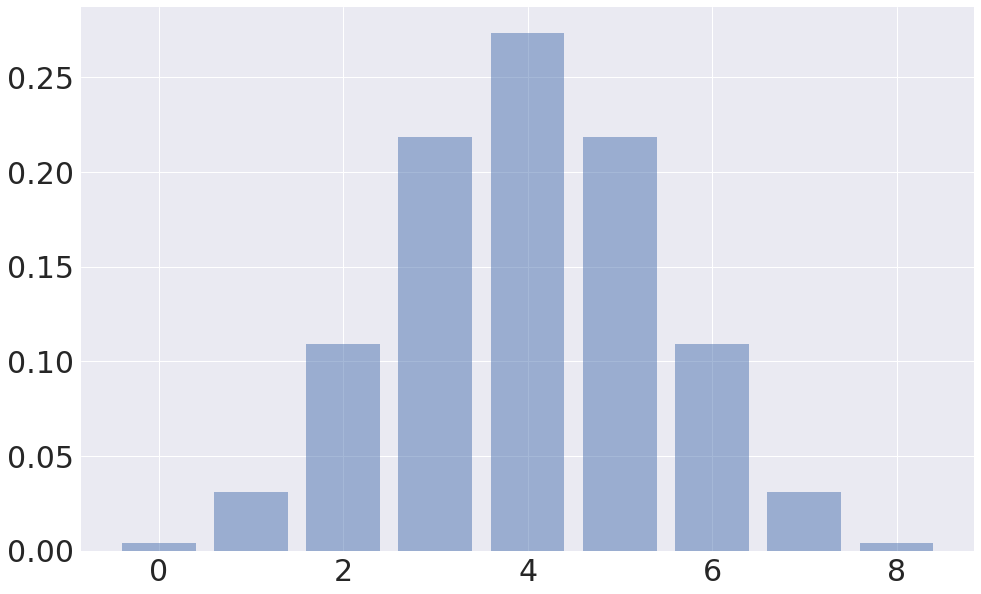

In [4]:
import scipy, scipy.stats
from scipy.stats import binom
import scipy, scipy.stats
x = np.arange(0, 9)
pmf = binom.pmf(x, 8, 0.5)

plt.figure(figsize=(16, 10))
plt.bar(x, pmf, alpha=0.5)
plt.show()

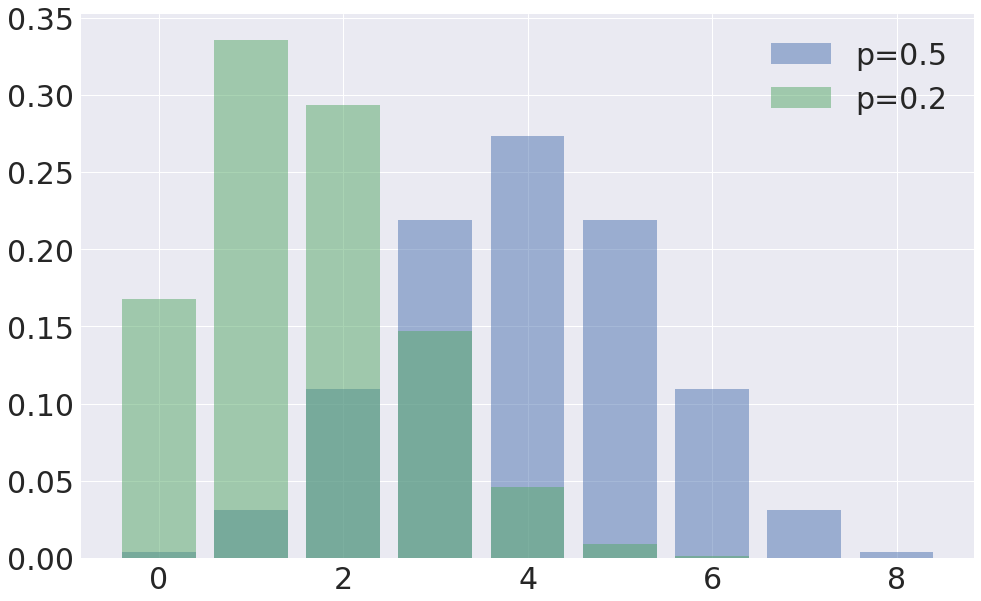

In [5]:
x = np.arange(0, 9)

plt.figure(figsize=(16, 10))

pmf = binom.pmf(x, 8, 0.5)
plt.bar(x, pmf, alpha=0.5, label='p=0.5')

pmf = binom.pmf(x, 8, 0.2)
plt.bar(x, pmf, alpha=0.5, label='p=0.2')

plt.legend()
plt.show()

In [6]:
distr = binom(n=8, p=0.5)

In [7]:
distr.pmf(0), distr.pmf(0) < alpha / 2

(0.003906250000000001, True)

In [8]:
distr.pmf(1), distr.pmf(1) < alpha / 2

(0.031250000000000014, False)

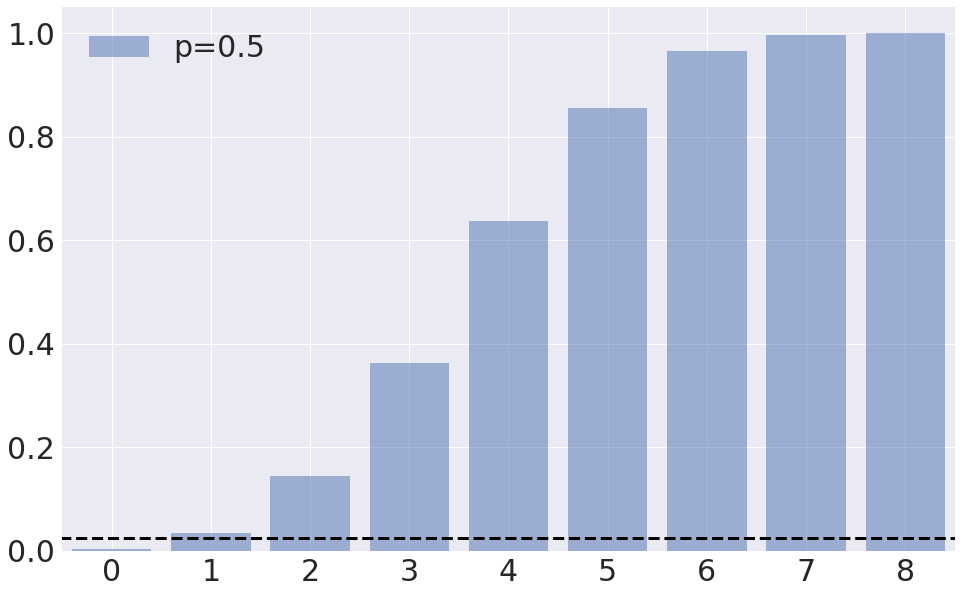

In [9]:
x = np.arange(-1, 10)

plt.figure(figsize=(16, 10))

pmf = binom.cdf(x, 8, 0.5)
plt.bar(x, pmf, alpha=0.5, label='p=0.5')

plt.plot(x, alpha * np.ones(len(x)) / 2, 'k', linewidth=3, linestyle='--')

plt.xlim(-0.5, 8.5)
plt.legend()
plt.show()

#### Получается что не получается построить гипотезу!

Мы применяем так называемое рандомизированное правило.

Т.е. мы говорим что гипотеза $H_0$ о $p = 0.5$ отвергается когда только одна монетка выпадает орлом. 

И отвергаем с вероятностью $w$, когда две монетки выпадают орлом.

Посчитаем эту вероятность $w$:

$$0.0039 + w \cdot 0.03125 = \frac{\alpha}{2}$$


$$w = 0.6752$$

Т.е. увидев только два орла(или две решки, так как задача симметричная) мы должны отклонить гипотезу о $p=0.5$ с вероятностью 0.6752.

In [10]:
def test_hypothesis(samples):
    rejected = (samples == np.random.choice([-1, 7], p=[1 - 0.6752, 0.6752], size=len(samples))).sum()
    rejected += (samples == np.random.choice([-1, 1], p=[1 - 0.6752, 0.6752], size=len(samples))).sum()
    rejected += (samples == 0).sum()
    rejected += (samples == 8).sum()
    return rejected / len(samples)

In [11]:
distr = binom(n=8, p=0.5)
samples = distr.rvs(size=1000000)
print('Эмпирическая ошибка первого рода: {}'.format(test_hypothesis(samples=samples)))

Эмпирическая ошибка первого рода: 0.050584


In [12]:
ps = np.linspace(0, 1, 50)
betas = []
for p in ps:
    distr = binom(n=8, p=p)
    samples = distr.rvs(size=10000)
    betas.append(1 - test_hypothesis(samples=samples))

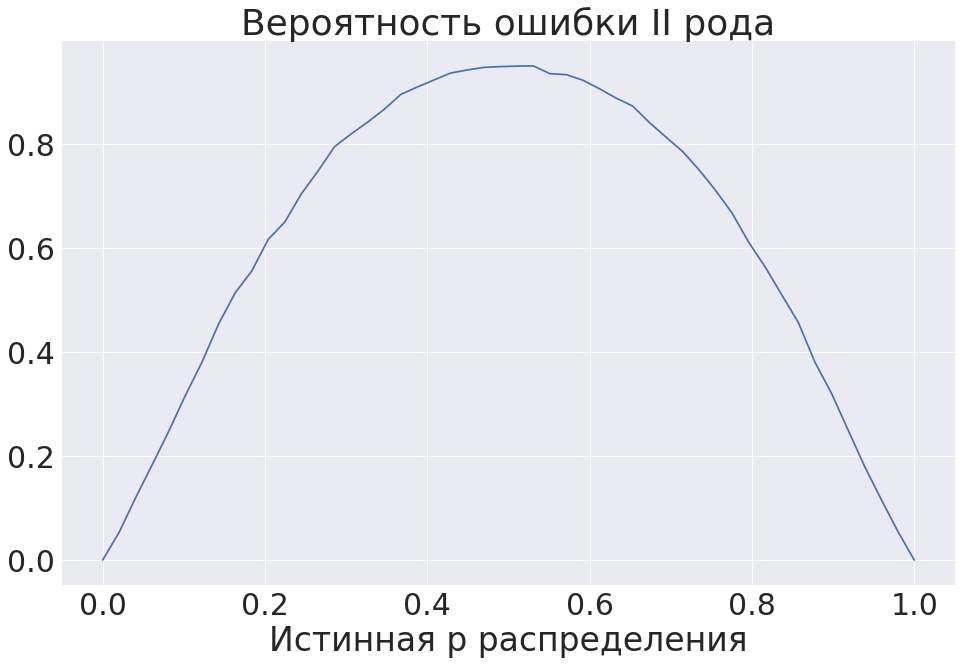

In [13]:
plt.figure(figsize=(16, 10))

plt.plot(ps, betas)
plt.title('Вероятность ошибки II рода')
plt.xlabel('Истинная p распределения')
plt.show()

##### Неожиданный момент!

Теперь, зная про критерий Неймана-Пирсона, мы может с уверенностью сказать что наш критерий является наиболее мощным среди всех критерией размера $\alpha$!

Действительно, выпишем статистику Неймана-Пирсона:

$$ T = \frac{C_n^k p^k (1 - p)^k}{C_n^k p_0^n} = \frac{p^k (1 - p)^k}{p_0^n}$$

Тогда нужно всего лишь найти threshold для данной статистики:
 
$$\mathbb{P}_{p_0} \left( \frac{p^k (1 - p)^k}{p_0^n} \geq \mathrm{threshold} \right) = \alpha$$

А это как раз соответствует нахождению плотности критических $k$ в хвостиках распределения.

# 2. Критерий Манна-Уитни

| Версия сайта | Общее количество визитов | Конверсия | Конверсия в процентах |
|--------------|--------------------------|-----------|-----------------------|
|  Version 1   | 10283                    | 3714      | 36%                   |
|  Version 2   | 2742                     | 1587      | 58%                   |
| Version 3    | 2747                     | 1652      | 60%                   |
| Version 4    | 3180                     | 1717      | 54%                   |
| Version 5    | 2064                     | 1348      | 65%                   |

Какой же вариант сайта лучше, а какие статистически объяснимые девиации от их своеобразных средних уровней?

##### Критерий Манна-Уитни(рабоче-крестьянский алгоритм)

Критерий Манна-Уитни используется для сравнения средних двух групп.

Cтатистика U считается следующим образом для двух выборок X и Y: 
  0. $U_1 = 0$
  1. Берутся все пары из двух выборок: $(x_i, y_i)$;
  2. Если $x_i > y_i$, то $U_1 += 1$;
  3. Если $x_i == y_i$, то $U_1 += 0.5$;
  4. Аналогично считается $U_2$ по парам $(y_i, x_i)$;
  5. $U = min(U_1, U_2)$
 
При больших размерах выборки:

$$U \sim N\left(\frac{mn}{2}, \frac{mn(n + m + 1)}{12}\right)$$

При большой выборке и __возможных ничьих__ $\sigma$ считается по-другому:

$$
\sigma = \sqrt{ \frac{nm}{(m + n) (m + n - 1)} \cdot \left[ \frac{(m + n)^3 - (m + n)}{12} - \sum \frac{t_j^3 - t_j}{12} \right]},
$$

где $t_j$ -- количество ничьих.


#### Замечательность рангового теста Манна-Уитни: 

  * работает для всех типов данных данных: дискретные, распределённые не нормально;
  * не обращает внимание на outliers;
  * связан с ROC-AUC.
  
  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1120984/

In [14]:
data = np.array([
    [10283, 3714],
    [2742, 1587],
    [2747, 1652],
    [3180, 1717],
    [2064, 1348]
])

alpha = 0.05 / 5 # 5 потому что бонферотти

In [15]:
def mann_whitney(conversion_1, conversion_2, alpha=0.05):
    """
    conversion = (N, n), где N -- общее число визитов, n -- конверсия
    True => H_0 отклоняется => средние не равны
    """
    U_1 = conversion_1[1] * (conversion_2[0] - conversion_2[1]) + conversion_1[1] * conversion_2[1] / 2 + (conversion_2[0] - conversion_2[1]) * (conversion_1[0] - conversion_1[1]) / 2
    U_2 = conversion_2[1] * (conversion_1[0] - conversion_1[1]) + conversion_1[1] * conversion_2[1] / 2 + (conversion_2[0] - conversion_2[1]) * (conversion_1[0] - conversion_1[1]) / 2
    
    mean = conversion_1[0] * conversion_2[0] / 2
    N = conversion_1[0] + conversion_2[0]
    mn = conversion_1[0] * conversion_2[0]
    t_1 = (conversion_1[0] - conversion_1[1]) + (conversion_2[0] - conversion_2[1])
    t_2 = conversion_1[1] + conversion_2[1]
    std = (mn / (N * (N - 1))) * ((N**3 - N) / 12 - 
                                 (t_1**3 - t_1) / 12 - 
                                 (t_2**3 - t_2) / 12 )
    std = np.sqrt(std)
    z = np.abs(min(U_1, U_2) - mean) / std 
    return z, z > norm.ppf(1 - alpha / 2)

### Тест Вальда

Статистика на которую мы смотрим:

$$T = \frac{\hat{p}_1 - \hat{p}_2}{\hat{se}}$$

Где дисперсия считается следующим образом:

$$\hat{se}^2 = \hat{se}_1^2 + \hat{se}_2^2$$

$$\hat{se}_1^2 = \frac{p_1 (1 - p_1)}{n_1}$$

Тестовая статистика имеет следующее распределение:

$$T \sim \mathcal{N}(0, 1)$$

In [16]:
from scipy.stats import norm
def wald_test(conversion_1, conversion_2, alpha=0.05):
    """
    Проверяется Вальд для Бернулли. 
    True => H_0 отклоняется => средние не равны.
    """
    p_1 = conversion_1[1] / conversion_1[0]
    p_2 = conversion_2[1] / conversion_2[0]
    se_1 = np.sqrt(p_1 * (1 - p_1) / conversion_1[0])
    se_2 = np.sqrt(p_2 * (1 - p_2) / conversion_2[0])
    se = np.sqrt(se_1**2 + se_2**2)
    return np.abs((p_1 - p_2) / se), np.abs((p_1 - p_2) / se) > norm.ppf(1 - alpha / 2)

In [17]:
from collections import defaultdict
results_mww = defaultdict(lambda: defaultdict(bool))
z_mww = []
for i in np.arange(len(data)):
    for j in np.arange(len(data)):
        z, flag = mann_whitney(data[i], data[j], alpha=alpha)
        print(z)
        z_mww.append(z)
        results_mww[i][j] = flag
        if results_mww[i][j]:
            print('Версия сайта {} с конверсией {:.2f} статистически отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                              data[i][1] / data[i][0],
                                                                                              j+1,
                                                                                              data[j][1] / data[j][0]))
        else:
            print('Версия сайта {} с конверсией {:.2f} статистически не отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                                         data[i][1] / data[i][0], 
                                                                                                         j+1,
                                                                                                         data[j][1] / data[j][0]))
        print()

0.0
Версия сайта 1 с конверсией 0.36 статистически не отличается от версии 1 с конверсией 0.36

20.607089406964572
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 2 с конверсией 0.58

22.72339288118447
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 3 с конверсией 0.60

17.95738651374319
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 4 с конверсией 0.54

24.60758946032845
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 5 с конверсией 0.65

20.607089406964572
Версия сайта 2 с конверсией 0.58 статистически отличается от версии 1 с конверсией 0.36

0.0
Версия сайта 2 с конверсией 0.58 статистически не отличается от версии 2 с конверсией 0.58

1.7027432222795187
Версия сайта 2 с конверсией 0.58 статистически не отличается от версии 3 с конверсией 0.60

3.000484275270596
Версия сайта 2 с конверсией 0.58 статистически отличается от версии 4 с конверсией 0.54

5.230413282646482
Версия сайта 2 с конверсией 0.58 ст

In [18]:
from collections import defaultdict
results_wald = defaultdict(lambda: defaultdict(bool))
z_wald = []
for i in np.arange(len(data)):
    for j in np.arange(len(data)):
        z, flag = wald_test(data[i], data[j], alpha=alpha)
        print(z)
        z_wald.append(z)
        results_wald[i][j] = flag
        if results_wald[i][j]:
            print('Версия сайта {} с конверсией {:.2f} статистически отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                              data[i][1] / data[i][0],
                                                                                              j+1,
                                                                                              data[j][1] / data[j][0]))
        else:
            print('Версия сайта {} с конверсией {:.2f} статистически не отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                 data[i][1] / data[i][0],
                                                                                 j+1,
                                                                                 data[j][1] / data[j][0]))
        print()

0.0
Версия сайта 1 с конверсией 0.36 статистически не отличается от версии 1 с конверсией 0.36

20.620895355293204
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 2 с конверсией 0.58

22.93344269021802
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 3 с конверсией 0.60

17.826653746799323
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 4 с конверсией 0.54

25.388815771018628
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 5 с конверсией 0.65

20.620895355293204
Версия сайта 2 с конверсией 0.58 статистически отличается от версии 1 с конверсией 0.36

0.0
Версия сайта 2 с конверсией 0.58 статистически не отличается от версии 2 с конверсией 0.58

1.70333528052776
Версия сайта 2 с конверсией 0.58 статистически не отличается от версии 3 с конверсией 0.60

3.0051027852151844
Версия сайта 2 с конверсией 0.58 статистически отличается от версии 4 с конверсией 0.54

5.273099827112846
Версия сайта 2 с конверсией 0.58 с

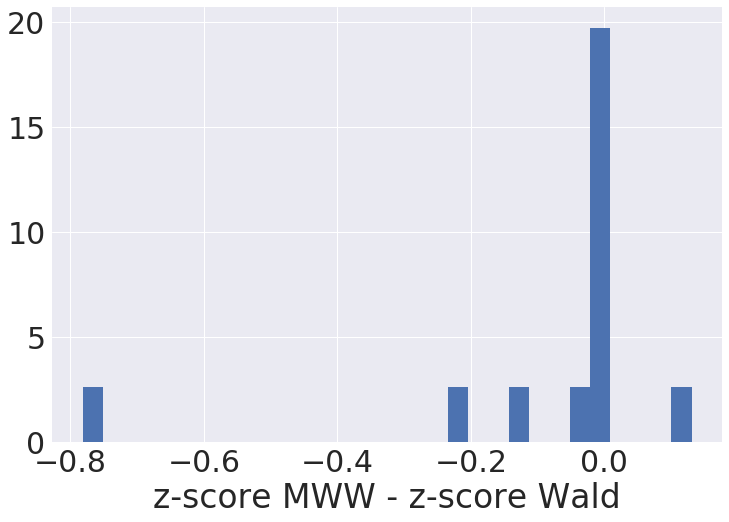

In [19]:
plt.figure(figsize=(12, 8))
plt.hist(np.array(z_mww) - np.array(z_wald), bins=30, density=True);
plt.xlabel('z-score MWW - z-score Wald')
plt.show()

# 3.1 ROC-AUC

ROC-AUC и статистика Манна-Уитни связаны очень простым соотношением:

$$\mathrm{ROC-AUC} = \frac{U}{n m }$$

$U$ считаеся по вероятностям, которые выдал классификатор, а $n$ и $m$ -- количество положительных и отрицательных примеров.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(font_scale=2)

На игрушечном датасете посмотрим что такое ROC-AUC.

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy.stats import rankdata, tiecorrect, mannwhitneyu


X, y = make_classification(n_samples=200, n_features=10, n_redundant=8, class_sep=0.9, 
                           n_informative=2, random_state=1337)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1337)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression().fit(X_train, y_train)

y_pred = lr.predict_proba(X_test)[:, 1]

print('ROC-AUC={}'.format(roc_auc_score(y_test, y_pred)))

ROC-AUC=0.9056000000000001


In [23]:
y_test_colors = y_test.copy().astype(np.object)
y_test_colors[y_test==0] = ['r']
y_test_colors[y_test==1] = ['g']

y_pred_argsorted = np.argsort(y_pred)


y_pred = y_pred[y_pred_argsorted]
y_test_colors = y_test_colors[y_pred_argsorted]
y_test = y_test[y_pred_argsorted]
X_test = X_test[y_pred_argsorted]

Посчитаем Манна-Уитни с помощью функции из `scipy.stats`.

In [24]:
mannwhitneyu?

In [25]:
mannwhitneyu(y_pred[y_test==1], y_pred[y_test==0], 
             alternative='two-sided')

MannwhitneyuResult(statistic=566.0, pvalue=9.157883328039219e-07)

In [26]:
n = np.sum(y_test==1)  # количество объектов положительного класса
m = np.sum(y_test==0)  # количесво объектов отрицательного класса

Удостверимся в равенстве:

$$\mathrm{ROC-AUC} = \frac{U}{n m }$$

In [27]:
mannwhitneyu(y_pred[y_test==1], y_pred[y_test==0], 
             alternative='two-sided')[0] / (n * m)

0.9056

Отлично!

Теперь для интерпретации ROC-AUC нам потребуется вытащить ранги. 

Ранг это порядок в отсортированном массиве.

In [28]:
ranks = rankdata(y_pred)
pos_ranks = ranks[y_test == 1]

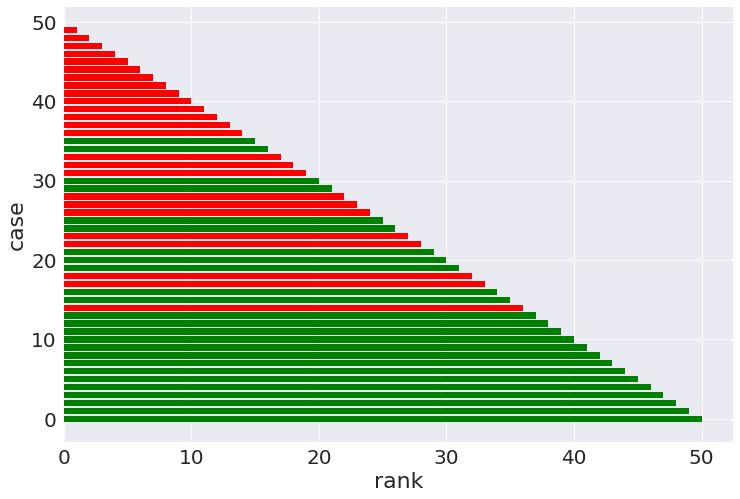

In [29]:
plt.figure(figsize=(12, 8))

plt.barh(np.arange(len(y_pred))[::-1], ranks, color=y_test_colors)

plt.ylabel('case')
plt.xlabel('rank')
plt.show()

In [30]:
x_offset = m + np.arange(1, n + 1) - pos_ranks

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred)

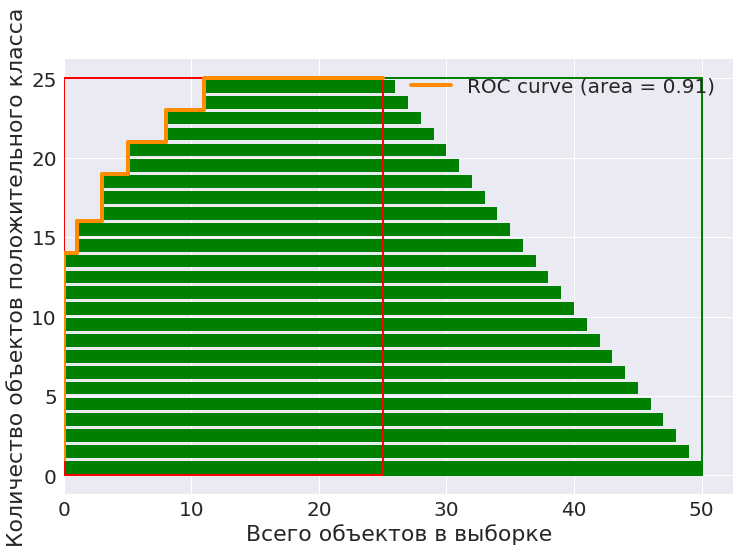

In [32]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(12, 8))
plt.barh(y=np.arange(n)[::-1] + 0.5, width=pos_ranks, left=x_offset, color='g')
plt.plot(m * fpr, n * tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc, lw=4)
plt.gca().add_patch(plt.Rectangle(xy=(m, 0), edgecolor='g',
                                  height=n, width=n, fill=False, linewidth=2))
plt.gca().add_patch(plt.Rectangle(xy=(0, 0), edgecolor='r',
                                  height=n, width=m, fill=False, linewidth=2))
plt.xlabel('Всего объектов в выборке')
plt.ylabel('Количество объектов положительного класса')
plt.legend(loc='best')
plt.show()

## Применим это к реальной задаче

Прочитаем данные и разобъём их на train/test выборки.

In [33]:
X = pd.read_csv('./cell2celltrain.csv')
msk = np.random.rand(len(X)) < 0.8
X_train = X[msk].copy()
X_test = X[~msk].copy()

columns = ['MonthlyRevenue', 'MonthlyMinutes',
           'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
           'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
           'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
           'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
           'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
           'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
           'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
           'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
           'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
           'BuysViaMailOrder', 'RespondsToMailOffers',
           'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
           'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
           'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
           'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
           'MadeCallToRetentionTeam', 'CreditRating', 'Occupation',
           'MaritalStatus']

Выкинем колонки `'ServiceArea', 'Homeownership', 'PrizmCode'`.

In [34]:
drop_columns = ['ServiceArea', 'Homeownership', 'PrizmCode']

X_train.drop(labels=drop_columns, axis=1, inplace=True)
X_test.drop(labels=drop_columns, axis=1, inplace=True)

Бинарные колонки закодируем как `0/1`.

In [35]:
bin_cols = ['Churn', 'HandsetRefurbished', 'HandsetWebCapable', 'RespondsToMailOffers',
            'TruckOwner', 'RVOwner', 'BuysViaMailOrder', 'OptOutMailings', 'NonUSTravel',
            'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser',
            'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'ChildrenInHH', 'MaritalStatus']
def preprocess_bin_cols(X, cols):
    for col in cols:
        X[col] = X[col].apply(lambda x: 1 if x == 'Yes' else 0)
        
        
preprocess_bin_cols(X_train, bin_cols)
preprocess_bin_cols(X_test, bin_cols)

In [36]:
def ohe(X_train, X_test, col):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

ohe(X_train, X_test, 'CreditRating')
ohe(X_train, X_test, 'Occupation')

Избавимся от NaN-данных.

In [37]:
X_train[X_train == 'Unknown'] = np.nan
X_train.fillna(0, inplace=True)

X_test[X_test == 'Unknown'] = np.nan
X_test.fillna(0, inplace=True)

Переводим в numpy-формат.

In [38]:
y_train = X_train.Churn.values
X_train = X_train[columns].values.astype(float)

y_test = X_test.Churn.values
X_test = X_test[columns].values.astype(float)

In [39]:
lr = LogisticRegression().fit(X_train, y_train)

y_pred = lr.predict_proba(X_test)[:, 1]

print('ROC-AUC={}'.format(roc_auc_score(y_test, y_pred)))

ROC-AUC=0.6274637714297365


In [40]:
y_test_colors = y_test.copy().astype(np.object)
y_test_colors[y_test==0] = ['r']
y_test_colors[y_test==1] = ['g']

y_pred_argsorted = np.argsort(y_pred)

y_pred = y_pred[y_pred_argsorted]
y_test_colors = y_test_colors[y_pred_argsorted]
y_test = y_test[y_pred_argsorted]
X_test = X_test[y_pred_argsorted]

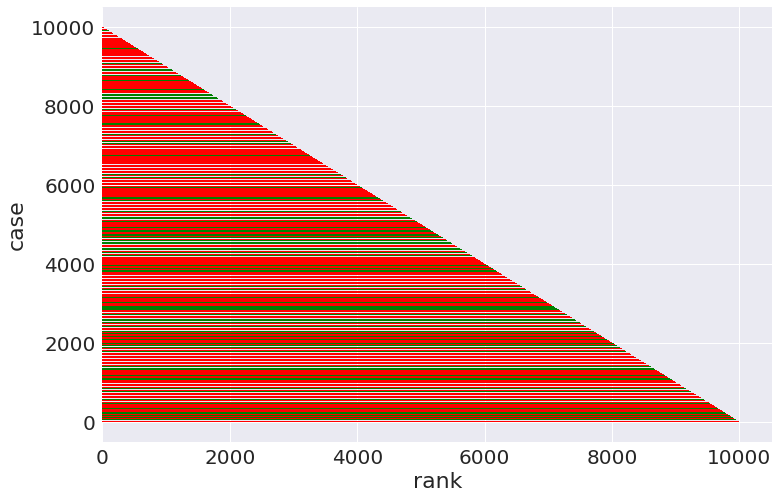

In [41]:
ranks = rankdata(y_pred)
pos_ranks = ranks[y_test == 1]

plt.figure(figsize=(12, 8))

plt.barh(np.arange(len(y_pred))[::-1], ranks, color=y_test_colors)

plt.ylabel('case')
plt.xlabel('rank')
plt.show()

In [42]:
n = np.sum(y_test==1)  # количество объектов положительного класса
m = np.sum(y_test==0)  # количесво объектов отрицательного класса

x_offset = m + np.arange(1, n + 1) - pos_ranks

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

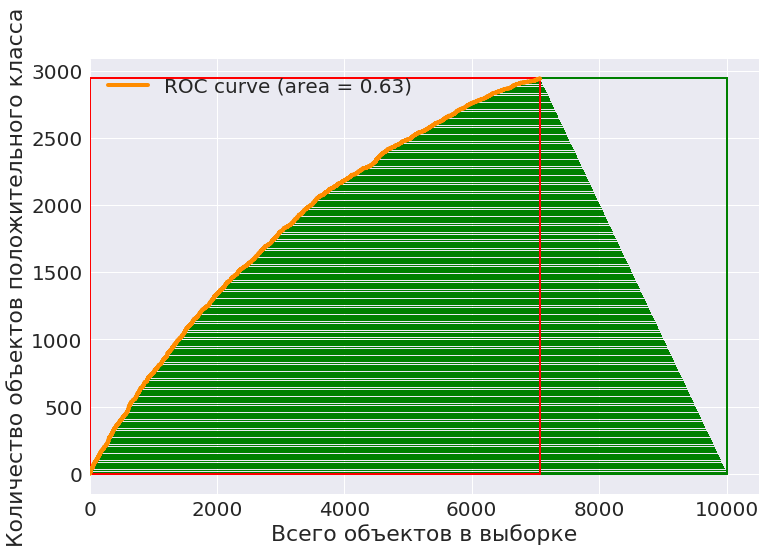

In [44]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(12, 8))
plt.barh(y=np.arange(n)[::-1] + 0.5, width=pos_ranks, left=x_offset, color='g')
plt.plot(m * fpr, n * tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc, lw=4)
plt.gca().add_patch(plt.Rectangle(xy=(m, 0), edgecolor='g',
                                  height=n, width=n, fill=False, linewidth=2))
plt.gca().add_patch(plt.Rectangle(xy=(0, 0), edgecolor='r',
                                  height=n, width=m, fill=False, linewidth=2))
plt.xlabel('Всего объектов в выборке')
plt.ylabel('Количество объектов положительного класса')
plt.legend(loc='best')
plt.show()

# 3.2 Три способа посчитать дисперсию ROC-AUC(на самом деле 4)

### Из предельного распределения статистики Манна-Уитни

При больших размерах выборки, как было написано выше:

$$U \sim \mathcal{N}\left(\frac{mn}{2}, \frac{mn(n + m + 1)}{12}\right)$$

то для ROC-AUC предельное распределение будет следующим:

$$ \mathrm{ROC-AUC} \sim \mathcal{N} \left(\frac{1}{2}, \frac{n + m + 1}{12 n m}\right) $$

В данном контексте $n$ и $m$ количество положительных и отрицательных примеров в выборке.

В данном вражении нас интересует только оценка стандартного отклонения:

$$\hat{se} = \sqrt{\frac{n + m + 1}{12 n m}}$$

Замечательностью и слабостью данной формулы является её независимость от $\widehat{AUC}$, т.е. можно использовать для планирования эксперимента при известных априорных распределений на $n$ и $m$.

In [45]:
def roc_auc_variance_from_mann_whitney(n1, n2):
    return (n1 + n2 + 1) / (12 * n1 * n2)

### Метод "Mcneil"(усложнённый вариант метода выше)

https://pubs.rsna.org/doi/10.1148/radiology.143.1.7063747

http://cejsh.icm.edu.pl/cejsh/element/bwmeta1.element.desklight-1f1afc51-6102-491f-a21d-de29ae98ce3b/c/MIBE_T15_z2_36.pdf

![](var_auc.png)

В данном контексте $\theta$ -- "истинный" ROC-AUC.

$$\hat{se} = \sqrt{ \frac{ (\hat{AUC} (1 - \hat{AUC}) + (n - 1)(Q_1 - \hat{AUC}^2) + (m - 1)(Q_2 - \hat{AUC}^2) )() }{n m} }$$

Плюс:
  * учитывает полученное значение AUC.

Минус:
  * сильное предположение о нормальности распределения.

In [46]:
def roc_auc_variance(auc, n1, n2):
    q1 = auc / (2 - auc)
    q2 = 2 * auc**2 / (1 + auc)
    return (auc * (1 - auc) + (n1 - 1) * (q1 - auc**2) + (n2 - 1) * (q2 - auc**2)) / (n1 * n2)

### Метод ДеЛонга 

https://www.ncbi.nlm.nih.gov/pubmed/3203132

Этот метод ещё дополнительно учитывает корреляции между положительным и отрицательными классами.

In [47]:
from compare_auc_delong_xu import delong_roc_variance

In [48]:
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

In [49]:
from tqdm import tqdm
auc_var_naives = []
auc_var_params = []
auc_var_delongs = []
aucs = []
model_names = []

for model_name, model in tqdm(models.items()):
    # train model
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    # estimate auc and variance
    auc = roc_auc_score(y_test, y_pred)
    n, m = y_test.sum(), len(y_test) - y_test.sum()
    auc_var_naive = roc_auc_variance_from_mann_whitney(n, m)
    auc_var_param = roc_auc_variance(auc, n, m)
    _, auc_var_delong = delong_roc_variance(y_test, y_pred)
    
    # add stats to lists
    model_names.append(model_name)
    auc_var_naives.append(auc_var_naive)
    auc_var_params.append(auc_var_param)
    auc_var_delongs.append(auc_var_delong)
    aucs.append(auc)
    
auc_var_naives = np.sqrt(np.array(auc_var_naives))
auc_var_params = np.sqrt(np.array(auc_var_params))
auc_var_delongs = np.sqrt(np.array(auc_var_delongs))
aucs = np.array(aucs)

100%|██████████| 3/3 [00:12<00:00,  4.33s/it]


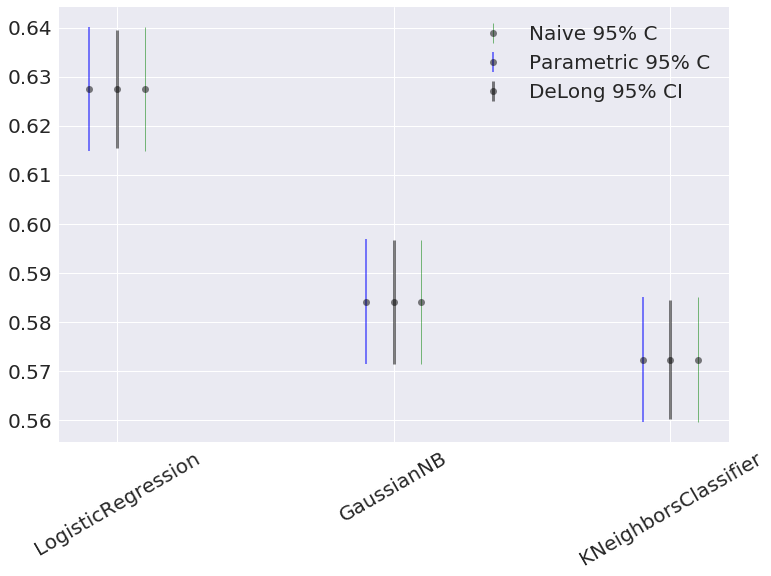

In [50]:
x = np.arange(len(aucs))
plt.figure(figsize=(12, 8))

plt.errorbar(x + 0.1, aucs, 2 * auc_var_naives, fmt='ok', lw=1, alpha=0.5, 
             ecolor='g', label='Naive 95% C')
plt.errorbar(x - 0.1, aucs, 2 * auc_var_params, fmt='ok', lw=2, alpha=0.5, 
             ecolor='b', label='Parametric 95% C')
plt.errorbar(x, aucs, 2 * auc_var_delongs, fmt='ok', lw=3, alpha=0.5, 
             ecolor='k', label='DeLong 95% CI')

plt.xticks(x, model_names, rotation=30)
plt.legend()
plt.show()

### Посмотрим на поведение стандартного отклонения ROC-AUC при маленькой выборке

In [51]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X, y = make_classification(n_samples=60, n_features=100, n_redundant=89, class_sep=0.3, 
                           n_informative=2, random_state=1337)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [52]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

def cv_auc_var_ci(model, X, y, B=100):
    aucs_std = []
    aucs = []
    for _ in range(B):
        aucs_tmp = cross_val_score(model, X=X, y=y, 
                                   scoring='roc_auc', 
                                   cv=StratifiedKFold(n_splits=5, shuffle=True))
        aucs_std.append(np.std(aucs_tmp))
        aucs.append(np.mean(aucs_tmp))
    return np.mean(aucs), np.mean(aucs_std), np.percentile(aucs, q=[2.5, 97.5])

In [53]:
from tqdm import tqdm
auc_var_naives = []
auc_var_params = []
auc_var_delongs = []
auc_var_boots = []
auc_ci_lows = []
auc_ci_highs = []
aucs_cv_means = []
aucs = []
model_names = []

for model_name, model in tqdm(models.items()):
    # train model
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    # estimate auc and variance
    auc = roc_auc_score(y_test, y_pred)
    n, m = y_test.sum(), len(y_test) - y_test.sum()
    auc_var_naive = roc_auc_variance_from_mann_whitney(n, m)
    auc_var_param = roc_auc_variance(auc, n, m)
    _, auc_var_delong = delong_roc_variance(y_test, y_pred)
    aucs_cv_mean, auc_var_boot, (auc_ci_low, auc_ci_high) = cv_auc_var_ci(model, X, y, B=500)
    # add stats to lists
    
    model_names.append(model_name)
    auc_var_naives.append(auc_var_naive)
    auc_var_params.append(auc_var_param)
    auc_var_delongs.append(auc_var_delong)
    auc_var_boots.append(auc_var_boot)
    auc_ci_lows.append(auc_ci_low)
    auc_ci_highs.append(auc_ci_high)
    aucs_cv_means.append(aucs_cv_mean)
    aucs.append(auc)
    
auc_var_naives = np.sqrt(np.array(auc_var_naives))
auc_var_params = np.sqrt(np.array(auc_var_params))
auc_var_delongs = np.sqrt(np.array(auc_var_delongs))
auc_var_boots = np.array(auc_var_boots)
auc_ci_lows = np.array(auc_ci_lows)
auc_ci_highs = np.array(auc_ci_highs)
aucs_cv_means = np.array(aucs_cv_means)
aucs = np.array(aucs)

100%|██████████| 3/3 [00:10<00:00,  3.52s/it]


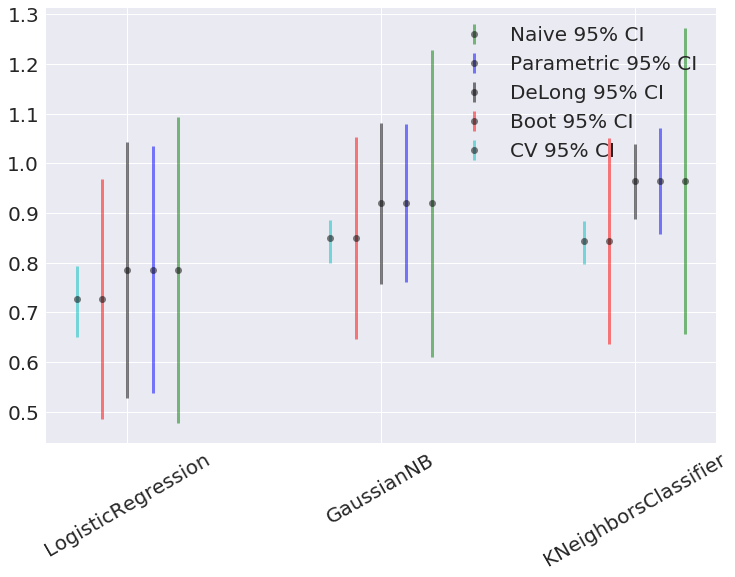

In [54]:
x = np.arange(len(aucs))
plt.figure(figsize=(12, 8))

plt.errorbar(x + 0.2, aucs, 2 * auc_var_naives, fmt='ok', lw=3, alpha=0.5, 
             ecolor='g', label='Naive 95% CI')
plt.errorbar(x + 0.1, aucs, 2 * auc_var_params, fmt='ok', lw=3, alpha=0.5, 
             ecolor='b', label='Parametric 95% CI')
plt.errorbar(x, aucs, 2 * auc_var_delongs, fmt='ok', lw=3, alpha=0.5, 
             ecolor='k', label='DeLong 95% CI')
plt.errorbar(x - 0.1, aucs_cv_means, 2 * auc_var_boots, fmt='ok', lw=3, alpha=0.5, 
             ecolor='r', label='Boot 95% CI')

# hack
plt.errorbar(x - 0.2, aucs_cv_means, np.array([aucs_cv_means - auc_ci_lows, auc_ci_highs - aucs_cv_means]), fmt='ok', lw=3, alpha=0.5, 
             ecolor='c', label='CV 95% CI')

plt.xticks(x, model_names, rotation=30)
plt.legend()
plt.show()

Три проблемы:

  * Как мы увидели, классические способы оценки дисперсии AUC быстры, но дают симметричный интервал;
  * $r\times q-\mathrm{fold}$ CV даёт более красивые интервалы, но крайне дорогой по времени;
  * Для `LogisticRegression` видна некоторая смещённость оценок.

# 4. Тест Уелча на примере рака груди

В данной задаче мы будем классифицировать злокачественные и доброкачественные опухоли груди. 

Мы запустим два классификатора и будем сравнивать качество прогноза и оценивать статистическую значимость разницы в качестве.

In [55]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")

In [56]:
df = pd.read_csv('data.csv');
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Первым делом - изучение датасета


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


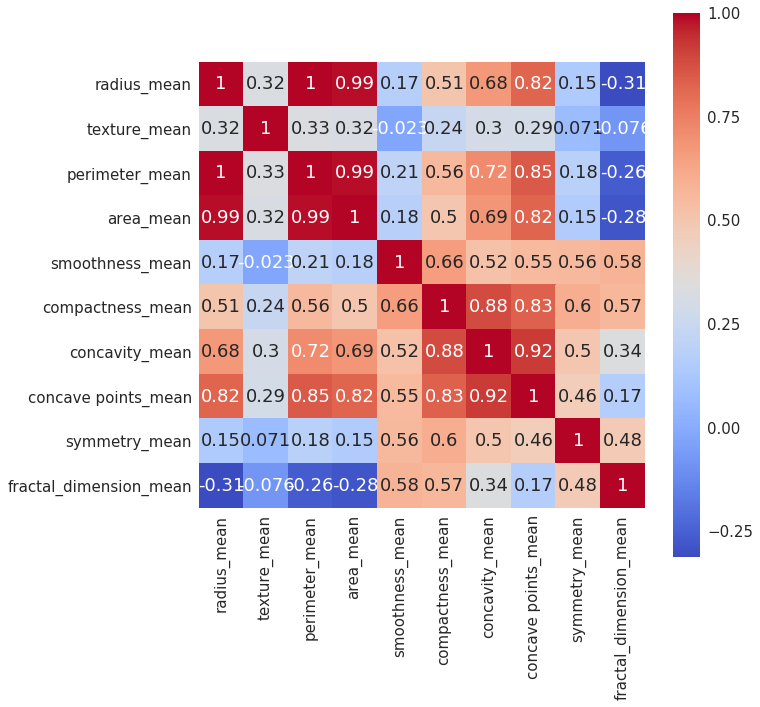

In [57]:
diagnosis_all = list(df.shape)[0]
diagnosis_categories = list(df['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                            diagnosis_categories[0], 
                                                                            diagnosis_categories[1]))
features_mean= list(df.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

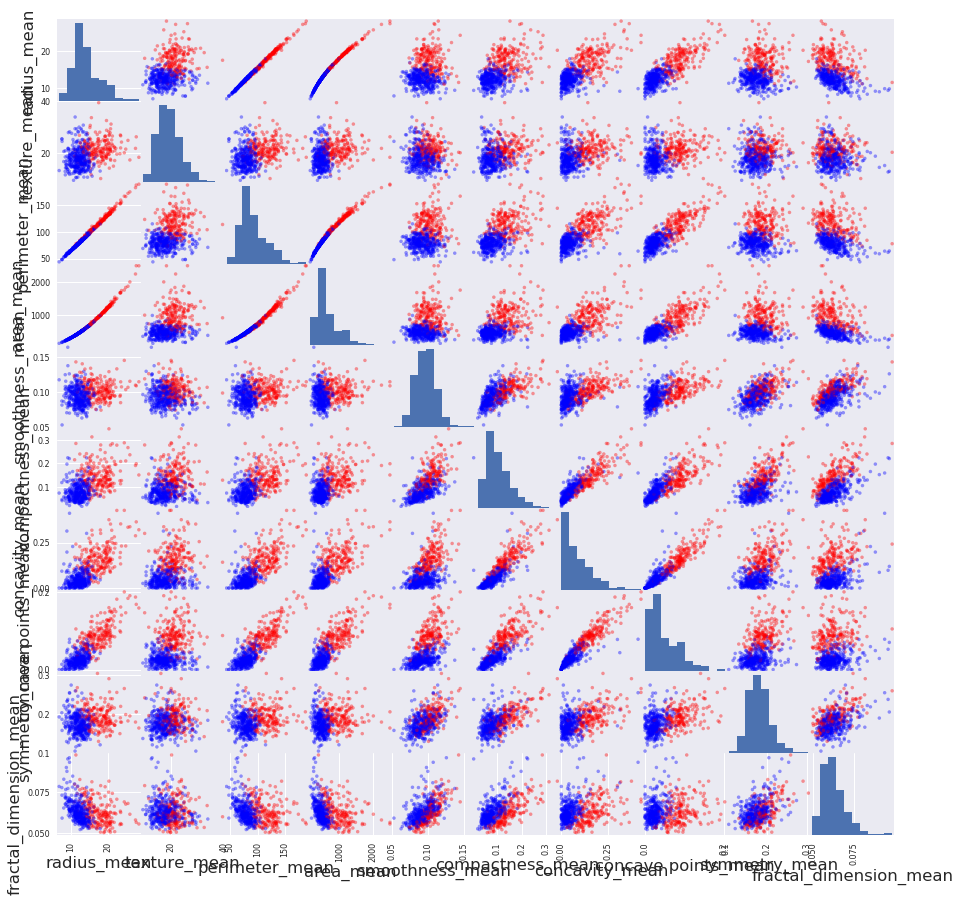

In [58]:
color_dic = {'M':'red', 'B':'blue'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.scatter_matrix(df[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

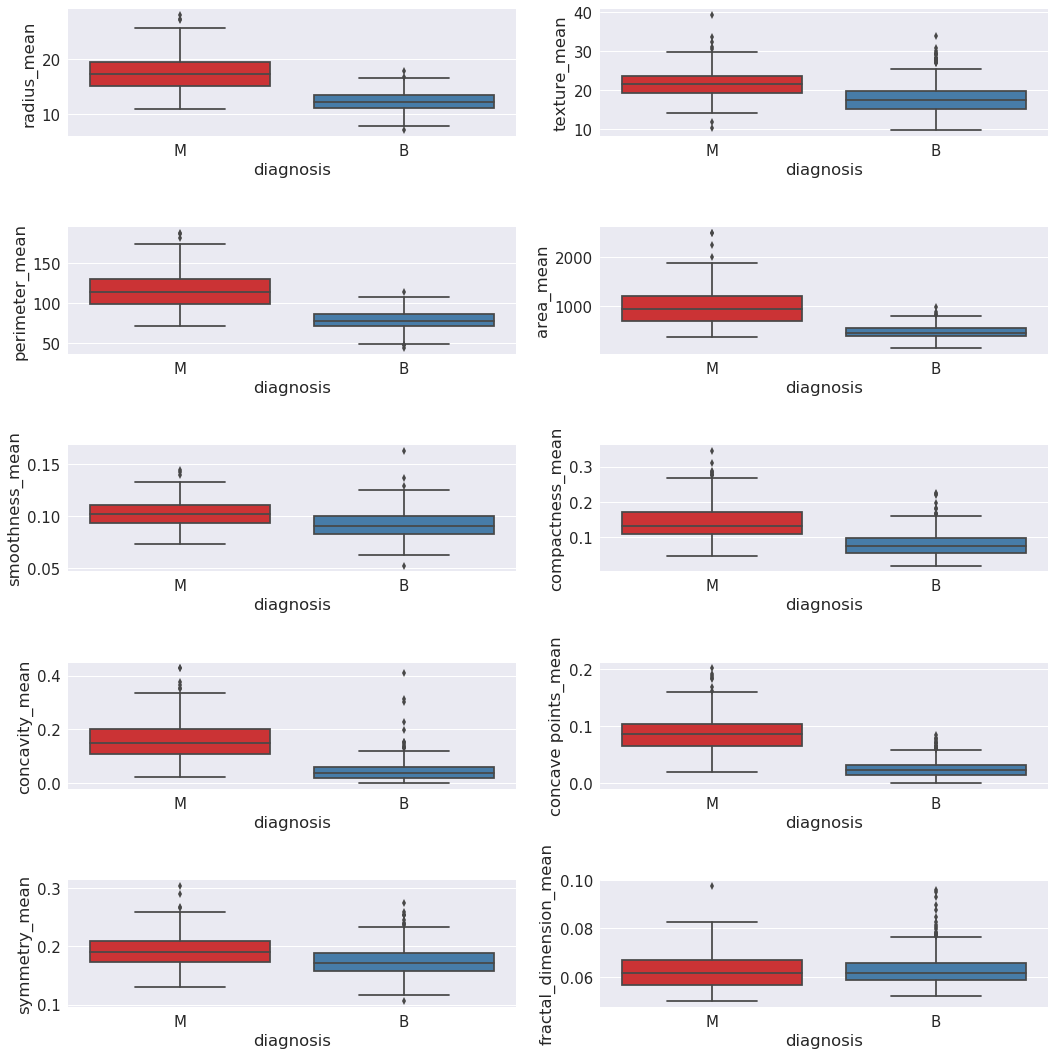

In [59]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    plt.subplot(rows, 2, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette="Set1")
plt.tight_layout()
plt.show()

### Тест Уельча

В отличии от $t-test$ в тесте Уельча ослабляется требование на одинаковую дисперсию двух сэмплов. Но остаётся требование нормального распределения статистик.

https://openlab-flowers.inria.fr/t/how-many-random-seeds-should-i-use-statistical-power-analysis-in-deep-reinforcement-learning-experiments/457

https://arxiv.org/pdf/1806.08295.pdf


![Тест Уелча](http://www.statistics4u.com/fundstat_eng/img/hl_explain_welch_test.png)

Импортируем функции для подсчёта бутстрапных статистик:

  * `def bootstrap` отвечает за подсчёт интервалов с помощью бутстрапа;
  * `bootstrap_ab` производит A/B-тестирование на двух сэмплах с помощью бутстрапа;
  * `bootstrap_test` - обёртка над `bootstrap_ab`, которая дополнительно сообщает прошли ли данные тест со значимостью на уровне $\alpha$.

In [60]:
from bootstrapped import *
from tests import bootstrap, bootstrap_ab, bootstrap_test
from tests import compute_beta, welch_test, empirical_false_pos_rate, plot_beta

In [61]:
# training the models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

diag_map = {'M':1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diag_map)

X = df.loc[:,features_mean]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

In [62]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores_knn = cross_val_score(clf, X, y, cv=100)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores_knn))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores_knn), np.std(scores_knn)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 93.86%
Cross validation score: 89.02% (+/- 29.13%)
Execution time: 0.18249 seconds 



In [63]:
#The Naive Bayes algorithm applies Bayes’ theorem with the assumption of independence between every pair of features.
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = GaussianNB() #  SGDClassifier(random_state=42)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores_gnb = cross_val_score(clf, X, y, cv=100)
end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores_gnb))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores_gnb), np.std(scores_gnb)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


Accuracy: 94.74%
Cross validation score: 91.36% (+/- 25.28%)
Execution time: 0.15842 seconds 



### Выставим ограничения на $\alpha$ и $\beta$: ошибки первого и второго рода


$$\mathrm{effect-size} = |\mu_1 - \mu_2|$$

In [64]:
# ошибка первого рода
alpha = 0.05

# ошибка первого рода
beta_requirement = 0.2


if scores_knn.mean() < scores_gnb.mean():
    m_smaller = scores_knn.mean()
else:
    m_smaller = scores_gnb.mean()

# размер выборки
sample_size = range(2, 50, 2)

# effect size -- какую разницу мы хотим уметь детектить?
epsilon = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]) * m_smaller
epsilon = epsilon.tolist()
print(epsilon)

[0.08901904761904764, 0.17803809523809527, 0.2670571428571429, 0.35607619047619055, 0.44509523809523815, 0.5341142857142858, 0.6231333333333334, 0.7121523809523811, 0.8011714285714286, 0.8901904761904763]


In [65]:
welch_test(scores_knn, scores_gnb, alpha, tail=2)
bootstrap_test(scores_knn, scores_gnb, alpha)



Results of the Welch's t-test level 00.05: there is not enough evidence to prove any order relation between μ1 and μ2.
Welch's t-test done.


Results of the bootstrap test level 00.05: there is not enough evidence to prove any order relation between μ1 and μ2.
Bootstrap test done.




Computing empirical false positive rate ..
     N = 2
     N = 4
     N = 6
     N = 8
     N = 10
     N = 12
     N = 14
     N = 16
     N = 18
     N = 20
     N = 22
     N = 24
     N = 26
     N = 28
     N = 30
     N = 32
     N = 34
     N = 36
     N = 38
     N = 40
     N = 42
     N = 44
     N = 46
     N = 48

   Given N=50 and α=00.05, you can expect false positive rates: 
     For the Welch's t-test: 0.054 
     For the bootstrap test: 0.058.
Done.


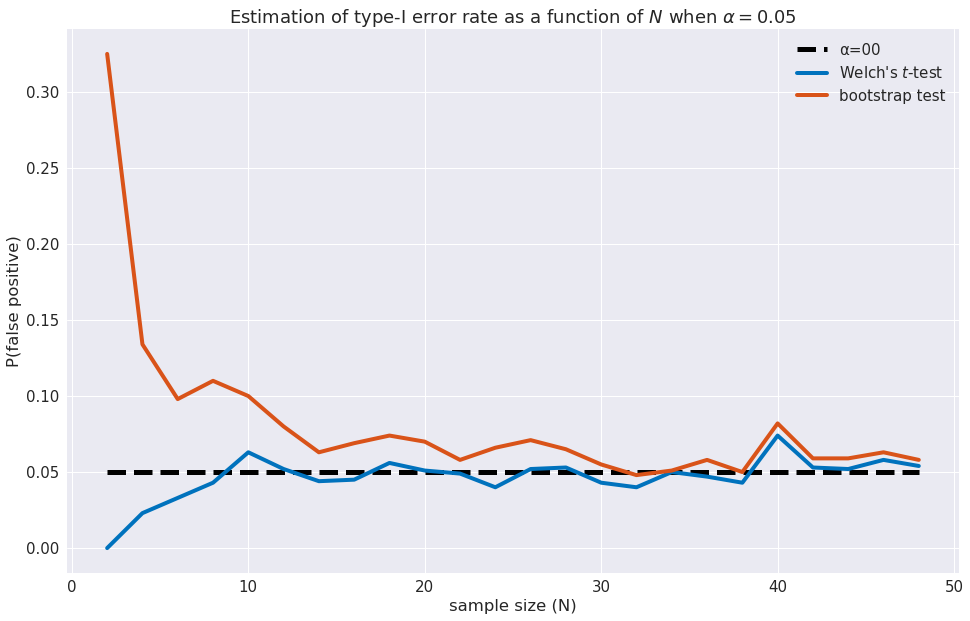

In [66]:
# выборка случайно бьётся на равные части 
# и для них случайно делается разбиение 
# и смотрится на ошибку первого рода
empirical_false_pos_rate(scores_knn, alpha)



Computing the false negative rate as a function of sample size, for various effect sizes ..

Sample sizes satisfying β=0.2 are:
     ε = 0.08901904761904764  -->  N: 32 
     ε = 0.17803809523809527  -->  N: 10 
     ε = 0.2670571428571429  -->  N: 6 
     ε = 0.35607619047619055  -->  N: 4 
     ε = 0.44509523809523815  -->  N: 4 
     ε = 0.5341142857142858  -->  N: 4 
     ε = 0.6231333333333334  -->  N: 2 
     ε = 0.7121523809523811  -->  N: 2 
     ε = 0.8011714285714286  -->  N: 2 
     ε = 0.8901904761904763  -->  N: 2 
 
Done.
[0.08901904761904764, 0.17803809523809527, 0.2670571428571429, 0.35607619047619055, 0.44509523809523815, 0.5341142857142858, 0.6231333333333334, 0.7121523809523811, 0.8011714285714286, 0.8901904761904763]


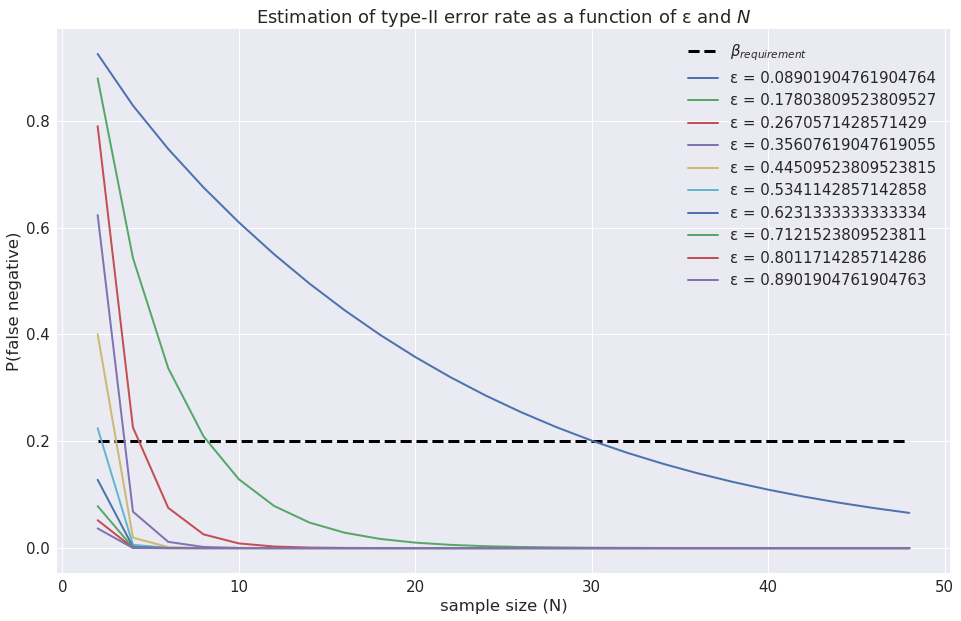

In [67]:
# чисто аналитический анализ
# выборки используются 
# только чтобы посчитать std
# разрешаем гипотезу относительно | \mu_1 - \mu_2 |

beta = compute_beta(epsilon, sample_size, alpha, 
                    scores_knn, scores_gnb, beta_requirement=beta_requirement)

plot_beta(beta, epsilon, sample_size, beta_requirement=beta_requirement)
plt.show()

https://git.generalassemb.ly/wave2-dc-f/experiments-hypothesis-tests/blob/master/03-hypothesis-testing.ipynb



# 5. Критерий Манна-Уитни

| Версия сайта | Общее количество визитов | Конверсия | Конверсия в процентах |
|--------------|--------------------------|-----------|-----------------------|
|  Version 1   | 10283                    | 3714      | 36%                   |
|  Version 2   | 2742                     | 1587      | 58%                   |
| Version 3    | 2747                     | 1652      | 60%                   |
| Version 4    | 3180                     | 1717      | 54%                   |
| Version 5    | 2064                     | 1348      | 65%                   |

Какой же вариант сайта лучше, а какие статистически объяснимые девиации от их своеобразных средних уровней?

##### Критерий Манна-Уитни(рабоче-крестьянский алгоритм)

Критерий Манна-Уитни используется для сравнения средних двух групп.

Cтатистика U считается следующим образом для двух выборок X и Y: 
  0. $U_1 = 0$
  1. Берутся все пары из двух выборок: $(x_i, y_i)$;
  2. Если $x_i > y_i$, то $U_1 += 1$;
  3. Если $x_i == y_i$, то $U_1 += 0.5$;
  4. Аналогично считается $U_2$ по парам $(y_i, x_i)$;
  5. $U = min(U_1, U_2)$
 
При больших размерах выборки:

$$U \sim N\left(\frac{mn}{2}, \frac{mn(n + m + 1)}{12}\right)$$

При большой выборке и __возможных ничьих__ $\sigma$ считается по-другому:

$$
\sigma = \sqrt{ \frac{nm}{(m + n) (m + n - 1)} \cdot \left[ \frac{(m + n)^3 - (m + n)}{12} - \sum \frac{t_j^3 - t_j}{12} \right]},
$$

где $t_j$ -- количество ничьих.


#### Замечательность рангового теста Манна-Уитни: 

  * работает для всех типов данных данных: дискретные, распределённые не нормально;
  * не обращает внимание на outliers;
  * связан с ROC-AUC.
  
  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1120984/

In [68]:
data = np.array([
    [10283, 3714],
    [2742, 1587],
    [2747, 1652],
    [3180, 1717],
    [2064, 1348]
])

alpha = 0.05 / 5 # 5 потому что бонферотти

In [69]:
def mann_whitney(conversion_1, conversion_2, alpha=0.05):
    """
    conversion = (N, n), где N -- общее число визитов, n -- конверсия
    True => H_0 отклоняется => средние не равны
    """
    U_1 = conversion_1[1] * (conversion_2[0] - conversion_2[1]) + conversion_1[1] * conversion_2[1] / 2 + (conversion_2[0] - conversion_2[1]) * (conversion_1[0] - conversion_1[1]) / 2
    U_2 = conversion_2[1] * (conversion_1[0] - conversion_1[1]) + conversion_1[1] * conversion_2[1] / 2 + (conversion_2[0] - conversion_2[1]) * (conversion_1[0] - conversion_1[1]) / 2
    
    mean = conversion_1[0] * conversion_2[0] / 2
    N = conversion_1[0] + conversion_2[0]
    mn = conversion_1[0] * conversion_2[0]
    t_1 = (conversion_1[0] - conversion_1[1]) + (conversion_2[0] - conversion_2[1])
    t_2 = conversion_1[1] + conversion_2[1]
    std = (mn / (N * (N - 1))) * ((N**3 - N) / 12 - 
                                 (t_1**3 - t_1) / 12 - 
                                 (t_2**3 - t_2) / 12 )
    std = np.sqrt(std)
    z = np.abs(min(U_1, U_2) - mean) / std 
    return z, z > norm.ppf(1 - alpha / 2)

### Тест Вальда

Статистика на которую мы смотрим:

$$T = \frac{\hat{p}_1 - \hat{p}_2}{\hat{se}}$$

Где дисперсия считается следующим образом:

$$\hat{se}^2 = \hat{se}_1^2 + \hat{se}_2^2$$

$$\hat{se}_1^2 = \frac{p_1 (1 - p_1)}{n_1}$$

Тестовая статистика имеет следующее распределение:

$$T \sim \mathcal{N}(0, 1)$$

In [70]:
from scipy.stats import norm
def wald_test(conversion_1, conversion_2, alpha=0.05):
    """
    Проверяется Вальд для Бернулли. 
    True => H_0 отклоняется => средние не равны.
    """
    p_1 = conversion_1[1] / conversion_1[0]
    p_2 = conversion_2[1] / conversion_2[0]
    se_1 = np.sqrt(p_1 * (1 - p_1) / conversion_1[0])
    se_2 = np.sqrt(p_2 * (1 - p_2) / conversion_2[0])
    se = np.sqrt(se_1**2 + se_2**2)
    return np.abs((p_1 - p_2) / se), np.abs((p_1 - p_2) / se) > norm.ppf(1 - alpha / 2)

In [71]:
from collections import defaultdict
results_mww = defaultdict(lambda: defaultdict(bool))
z_mww = []
for i in np.arange(len(data)):
    for j in np.arange(len(data)):
        z, flag = mann_whitney(data[i], data[j], alpha=alpha)
        print(z)
        z_mww.append(z)
        results_mww[i][j] = flag
        if results_mww[i][j]:
            print('Версия сайта {} с конверсией {:.2f} статистически отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                              data[i][1] / data[i][0],
                                                                                              j+1,
                                                                                              data[j][1] / data[j][0]))
        else:
            print('Версия сайта {} с конверсией {:.2f} статистически не отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                                         data[i][1] / data[i][0], 
                                                                                                         j+1,
                                                                                                         data[j][1] / data[j][0]))
        print()

0.0
Версия сайта 1 с конверсией 0.36 статистически не отличается от версии 1 с конверсией 0.36

20.607089406964572
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 2 с конверсией 0.58

22.72339288118447
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 3 с конверсией 0.60

17.95738651374319
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 4 с конверсией 0.54

24.60758946032845
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 5 с конверсией 0.65

20.607089406964572
Версия сайта 2 с конверсией 0.58 статистически отличается от версии 1 с конверсией 0.36

0.0
Версия сайта 2 с конверсией 0.58 статистически не отличается от версии 2 с конверсией 0.58

1.7027432222795187
Версия сайта 2 с конверсией 0.58 статистически не отличается от версии 3 с конверсией 0.60

3.000484275270596
Версия сайта 2 с конверсией 0.58 статистически отличается от версии 4 с конверсией 0.54

5.230413282646482
Версия сайта 2 с конверсией 0.58 ст

In [72]:
from collections import defaultdict
results_wald = defaultdict(lambda: defaultdict(bool))
z_wald = []
for i in np.arange(len(data)):
    for j in np.arange(len(data)):
        z, flag = wald_test(data[i], data[j], alpha=alpha)
        print(z)
        z_wald.append(z)
        results_wald[i][j] = flag
        if results_wald[i][j]:
            print('Версия сайта {} с конверсией {:.2f} статистически отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                              data[i][1] / data[i][0],
                                                                                              j+1,
                                                                                              data[j][1] / data[j][0]))
        else:
            print('Версия сайта {} с конверсией {:.2f} статистически не отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                 data[i][1] / data[i][0],
                                                                                 j+1,
                                                                                 data[j][1] / data[j][0]))
        print()

0.0
Версия сайта 1 с конверсией 0.36 статистически не отличается от версии 1 с конверсией 0.36

20.620895355293204
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 2 с конверсией 0.58

22.93344269021802
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 3 с конверсией 0.60

17.826653746799323
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 4 с конверсией 0.54

25.388815771018628
Версия сайта 1 с конверсией 0.36 статистически отличается от версии 5 с конверсией 0.65

20.620895355293204
Версия сайта 2 с конверсией 0.58 статистически отличается от версии 1 с конверсией 0.36

0.0
Версия сайта 2 с конверсией 0.58 статистически не отличается от версии 2 с конверсией 0.58

1.70333528052776
Версия сайта 2 с конверсией 0.58 статистически не отличается от версии 3 с конверсией 0.60

3.0051027852151844
Версия сайта 2 с конверсией 0.58 статистически отличается от версии 4 с конверсией 0.54

5.273099827112846
Версия сайта 2 с конверсией 0.58 с

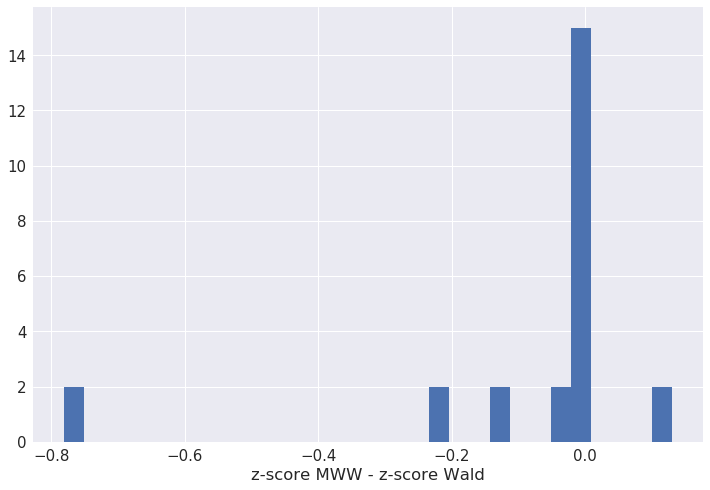

In [73]:
plt.figure(figsize=(12, 8))
plt.hist(np.array(z_mww) - np.array(z_wald), bins=30);
plt.xlabel('z-score MWW - z-score Wald')
plt.show()

# 4. Коррекция на множественные тесты при построении GLM


Пример частично адаптирован из `nilern`: https://nilearn.github.io/decoding/decoding_intro.html

[1] Winkler, A. M. et al. (2014). Permutation inference for the general linear model. Neuroimage.

[2] Anderson, M. J. & Robinson, J. (2001). Permutation tests for linear models. Australian & New Zealand Journal of Statistics, 43(1), 75-88. (http://avesbiodiv.mncn.csic.es/estadistica/permut2.pdf)

##### Работаем с данными из датасета Haxby

Haxby et al. (2001): Faces and Objects in Ventral Temporal Cortex (fMRI) - височная кора головного мозга 
https://nilearn.github.io/auto_examples/02_decoding/plot_haxby_stimuli.html

![Датасет](https://www.researchgate.net/profile/Martin_Hebart/publication/270749420/figure/fig2/AS:272567755866138@1441996625521/Results-of-analyses-on-Haxby-2001-data-set-A-Confusion-matrix-reflecting-the-confusion.png)

Brain mapping

https://youtu.be/k61nJkx5aDQ?t=15

In [74]:
import nilearn
import pandas as pd
from nilearn import datasets
from scipy.misc import imread
from nilearn import datasets
from nilearn.plotting import show

/home/acapello/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/acapello/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [75]:
#Load Haxby dataset
haxby_dataset = datasets.fetch_haxby(subjects=[2], fetch_stimuli=True)
haxby_dataset.keys()

dict_keys(['anat', 'func', 'session_target', 'mask_vt', 'mask_face', 'mask_house', 'mask_face_little', 'mask_house_little', 'mask', 'description', 'stimuli'])

In [76]:
stimulus_information = haxby_dataset.stimuli

/home/acapello/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:165: DeprecationWarning: `fromimage` is deprecated!
`fromimage` is deprecated in SciPy 1.0.0. and will be removed in 1.2.0.
Use ``np.asarray(im)`` instead.
  return fromimage(im, flatten=flatten, mode=mode)


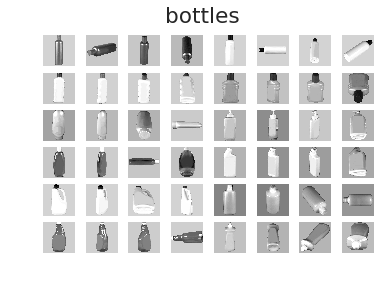

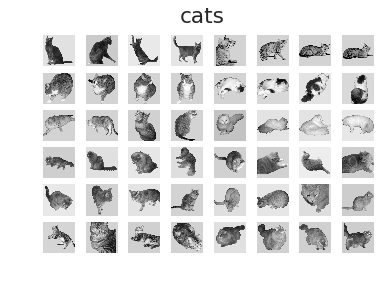

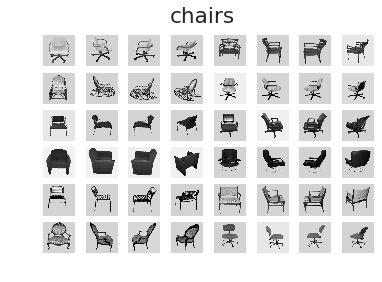

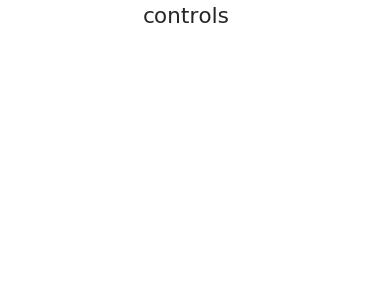

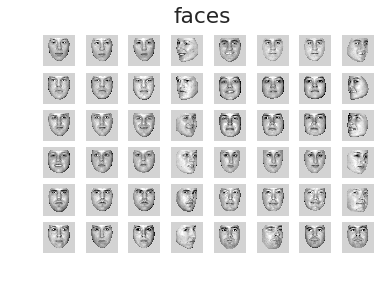

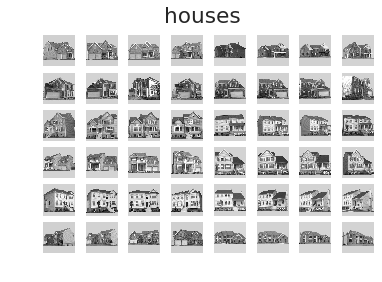

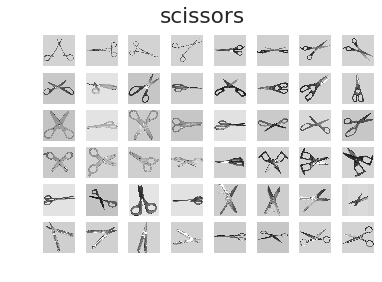

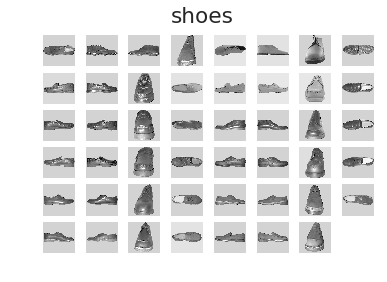

In [77]:
for stim_type in sorted(stimulus_information.keys()):
    if stim_type == b'controls':
        continue
    file_names = stimulus_information[stim_type]
    plt.figure()
    for i in range(48):
        plt.subplot(6, 8, i + 1)
        try:
            plt.imshow(imread(file_names[i]), cmap=plt.cm.gray)
        except:
            pass
        plt.axis("off")
    plt.suptitle(stim_type)
show()

In [78]:
print(haxby_dataset.func[0])
img_temp = nilearn.image.load_img(haxby_dataset.func[0])
print(img_temp.shape)

/home/acapello/nilearn_data/haxby2001/subj2/bold.nii.gz
(40, 64, 64, 1452)


In [79]:
print(haxby_dataset.session_target[0])
behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
conditions = behavioral['labels']
print(behavioral.shape)
behavioral.head()

/home/acapello/nilearn_data/haxby2001/subj2/labels.txt
(1452, 2)


,labels,chunks
0,rest,0
1,rest,0
2,rest,0
3,rest,0
4,rest,0


In [80]:
# Размер одного фмрт изображения, где первые 3 начения это разрешения 3D картинки и 1452 отсчета по времени
print(img_temp.shape)
# И для каждого отсчета известны ключи (визуальные стимулы) для task-based fMRI 
print(conditions.shape)

(40, 64, 64, 1452)
(1452,)


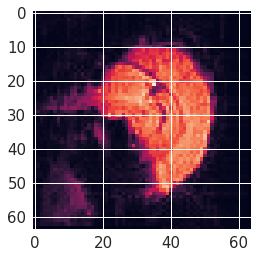

In [81]:
# Воксель - это 3D пиксель. 
# То есть ниже [20,...] -- двухмерный срез пикселей из трехмерного массива, 800 -- отсчет времени
plt.imshow(img_temp.dataobj[20, ..., 800])
# Тут же можно оценить глазами интенсивность каждого вокселя: условно, 
# чем больше крови аккумулируется в данном участке мозга,
# тем интенсивнее сигнал и тем выше активность этого этого региона для каждой когнитивной функции.

![Зачем мы маскируем](http://nilearn.github.io/_images/masking.jpg)

Выберем только нужные вокселы для анализа (домножим 4D массивы на маску): 
Мы работаем уже с предобработанными мозгами в специальном софте: для нас мозги повернули, проскалировали, алайнили друг с другом и натянули на "шаблонный мозг" в специальной координатной системе MNI.

![Mask for fMRI series](https://nilearn.github.io/_images/sphx_glr_plot_visualization_0021.png)

In [82]:
# mask data
mask_filename = haxby_dataset.mask
from nilearn.input_data import NiftiMasker
nifti_masker = NiftiMasker(smoothing_fwhm=4, mask_img=mask_filename, memory='nilearn_cache', memory_level=1)  # cache options
func_filename = haxby_dataset.func[0]
fmri_masked = nifti_masker.fit_transform(func_filename)

In [83]:
# Теперь у нас есть 2D массив, который мы и будем использовать в качестве датасета.
# Каждому визуальному ключу ( отсчету времени) соотносятся интенсивности вокселей
# (да, да все воксели кортикальной височной зоны для 1 человека из 6):
print(fmri_masked.shape)
# То есть 
print('Для целикового изображения было бы {}, но мы снизили размерность в 4 раза, наложив маску до 39912'.format(40*64*64))

(1452, 39912)
Для целикового изображения было бы 163840, но мы снизили размерность в 4 раза, наложив маску до 39912


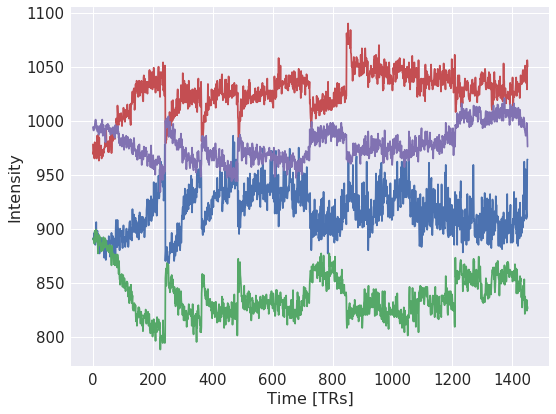

In [84]:
# Посмотрим на то, как изменяется сигнал интенсивности одного вокселя во времени (для 1 человека)
plt.figure(figsize=(8, 6))
plt.plot(fmri_masked[:, 11132:11136])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
show()

#### Ограничим наши данные домами и лицами

In [85]:
labels = pd.read_csv(haxby_dataset.session_target[0], sep=" ")

conditions = labels['labels']
categories = conditions.unique()
conditions_encoded = np.zeros_like(conditions)

for c, category in enumerate(categories):
    conditions_encoded[conditions == category] = c

sessions = labels['chunks']
condition_mask = conditions.isin(['face', 'house'])
conditions_encoded = conditions_encoded[condition_mask]
fmri_masked = fmri_masked[condition_mask]

# Мы посчитаем, среднее изображение и состояние сессии.
# В противном случае, наблюдения не могут быть обменены в случайном порядке, потому что
# существует зависимость между наблюдениями в рамках одной сессии.
n_sessions = np.unique(sessions).size
grouped_fmri_masked = np.empty((2 * n_sessions,  # two conditions per session
                                fmri_masked.shape[1]))
grouped_conditions_encoded = np.empty((2 * n_sessions, 1))

for s in range(n_sessions):
    session_mask = sessions[condition_mask] == s
    session_house_mask = np.logical_and(session_mask,
                                        conditions[condition_mask] == 'house')
    session_face_mask = np.logical_and(session_mask,
                                       conditions[condition_mask] == 'face')
    grouped_fmri_masked[2 * s] = fmri_masked[session_house_mask].mean(0)
    grouped_fmri_masked[2 * s + 1] = fmri_masked[session_face_mask].mean(0)
    grouped_conditions_encoded[2 * s] = conditions_encoded[session_house_mask][0]
    grouped_conditions_encoded[2 * s + 1] = conditions_encoded[session_face_mask][0]

In [86]:
# То есть выбрали только для 2х тем ( по 12 сессия каждая) 
# и размерность осталась как у каждого человека
grouped_fmri_masked.shape

(24, 39912)

In [87]:
# Посмотрим на наши ключи:
# визуальные стимулы показывали сессиями chunks по 9 временных отсчетов (временной интервал около 2.5 секунд). 
# можно, кстати, посчитать, что люди лежали в томографе 2.5*1452/3600=1.008 - почти час
# всего сессий было 12.
labels['labels'].value_counts()

rest            588
scissors        108
shoe            108
cat             108
bottle          108
scrambledpix    108
house           108
face            108
chair           108
Name: labels, dtype: int64

In [88]:
grouped_conditions_encoded.shape

(24, 1)

Оценим величину корреляции(проверим гипотезу о линейной зависимости/независимости двух сессий  `Дома` и `Лица`).

In [89]:
threshold = -np.log10(0.2)  # Попробуем эмпирический трешхолд 10%

### F-test

Для отбора важный признаков мы будем использовать f-regression, которая основана на F-тесте.

Расчёт делается в этапов.


1. Считаем корреляцию признака и таргета:

$$f = \frac{\sum\limits_i (x_i - \bar{x}) (y_i - \bar{y})}{\widehat{se}(x) \widehat{se}(y)}$$

2. Считаем f-score:

$$\mathrm{F-score} = \frac{f^2}{1 - f^2} \cdot \mathrm{ddof}$$

ddof -- число степеней свободы.

3. Считаем p-value:

Данная статистика имеет f-распределение со следующей плотностью:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a55e68498f7fd2c02998e8692ce340c3e9a5cedf)


И так как p-value это интеграл хвостика, то:

$$ \mathrm{p-value} = 1 - cdf(\mathrm{F-score}, 1, \mathrm{ddof}) $$


__Примечание:__ F-test очень тесно связан с ANOVA, поэтому более детальное его обсуждение будет на следующем занятии. 

In [90]:
from sklearn.feature_selection import f_regression
f_regression?

In [91]:
_, pvals_bonferroni = f_regression(X=grouped_fmri_masked, y=grouped_conditions_encoded)
pvals_bonferroni *= fmri_masked.shape[1] # Корреция на множественное сравнение - Bonferroni to death
pvals_bonferroni[np.isnan(pvals_bonferroni)] = 1
pvals_bonferroni[pvals_bonferroni > 1] = 1
neg_log_pvals_bonferroni = -np.log10(pvals_bonferroni)
neg_log_pvals_bonferroni_unmasked = nifti_masker.inverse_transform(neg_log_pvals_bonferroni)

/home/acapello/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
_, pvals_fdr = f_regression(X=grouped_fmri_masked, y=grouped_conditions_encoded)

pvals_argsorted = np.argsort(pvals_fdr)
mask = pvals_fdr[pvals_argsorted] <= 10**(-threshold) * np.arange(1, len(pvals_fdr) + 1) / len(pvals_fdr)

/home/acapello/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/acapello/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


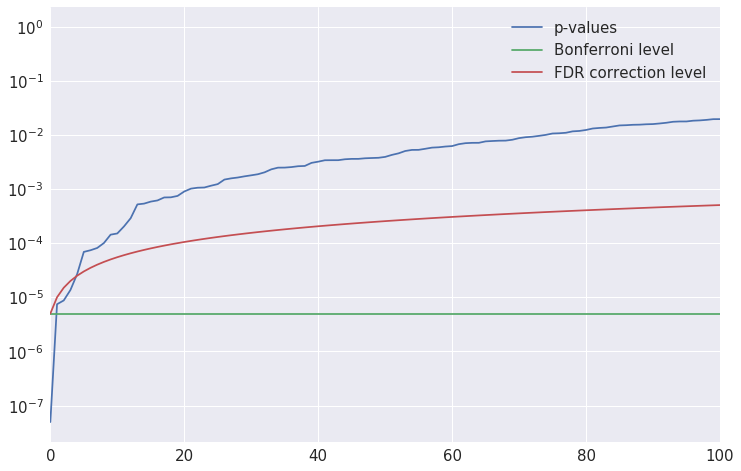

In [93]:
from sklearn.feature_selection import f_regression

_, pvals = f_regression(X=grouped_fmri_masked, y=grouped_conditions_encoded)
alpha = 0.2

plt.figure(figsize=(12, 8))

plt.plot(np.arange(len(pvals)), np.sort(pvals), label='p-values')
plt.plot(np.arange(len(pvals)), len(pvals) * [alpha / len(pvals)], label='Bonferroni level')
plt.plot(np.arange(len(pvals)), np.arange(1, len(pvals) + 1) * alpha / len(pvals), label='FDR correction level')
plt.legend()
plt.yscale('log')
plt.xlim(0, 100)
plt.show()

In [94]:
from statsmodels.stats import multitest
mask, *_ = multitest.multipletests(pvals_fdr, alpha=10**(-threshold), method='fdr_bh')
    
mask_fdr_unmasked = nifti_masker.inverse_transform(mask)

neg_log_pvals_fdr = -np.log10(pvals_fdr)
neg_log_pvals_fdr[~mask] = 0
neg_log_pvals_fdr = neg_log_pvals_fdr
neg_log_pvals_fdr_unmasked  = nifti_masker.inverse_transform(neg_log_pvals_fdr)

/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


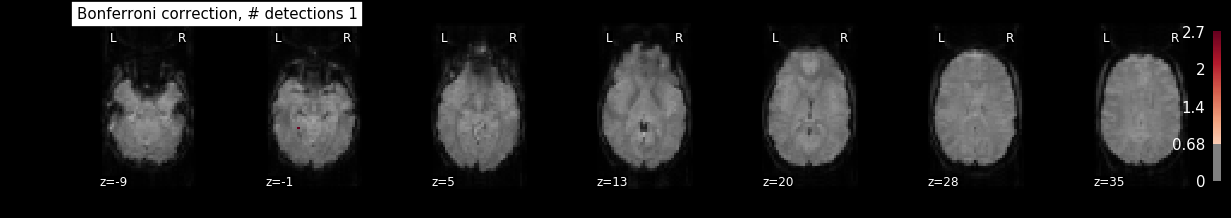

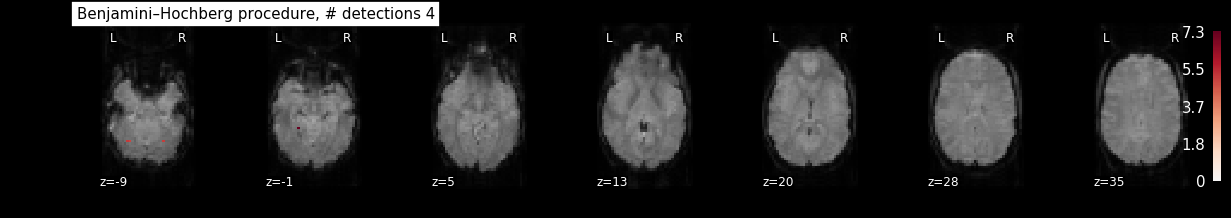

In [95]:
from nilearn.plotting import plot_stat_map, show
# Сконкатим все мозги, чтобы построить воксели на "усредненном" изображении
from nilearn import image
mean_fmri_img = image.mean_img(func_filename)


display = plot_stat_map(neg_log_pvals_bonferroni_unmasked, mean_fmri_img,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        display_mode='z',
                        vmax=neg_log_pvals_bonferroni.max())

neg_log_pvals_bonferroni_data = neg_log_pvals_bonferroni_unmasked.get_data()
n_detections = (neg_log_pvals_bonferroni_data > threshold).sum()
title = 'Bonferroni correction, # detections {}'.format(n_detections)
display.title(title, y=1.1)
show()

display = plot_stat_map(neg_log_pvals_fdr_unmasked, mean_fmri_img,
                        cmap=plt.cm.RdBu_r,
                        display_mode='z',
                        vmax=neg_log_pvals_fdr.max())

n_detections = (np.abs(mask_fdr_unmasked.dataobj)).sum()
title = 'Benjamini–Hochberg procedure, # detections {}'.format(n_detections)
display.title(title, y=1.1)
show()

### Усилимся и подключим GLM

Будем увеличивать точность классификации и попробуем классифицировать все объекты.

In [96]:
# mask data
mask_filename = haxby_dataset.mask
from nilearn.input_data import NiftiMasker
nifti_masker = NiftiMasker(smoothing_fwhm=4, mask_img=mask_filename, memory='nilearn_cache', memory_level=1)  # cache options
func_filename = haxby_dataset.func[0]
fmri_masked = nifti_masker.fit_transform(func_filename)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from collections import defaultdict
from tqdm import tqdm
from sklearn.feature_selection import f_regression, chi2

In [98]:
stimuli = labels['labels']
# Уберем сессии resting state -без визуального стимула
task_mask = (stimuli != 'rest')
# Создадим список названий стимулов
categories = stimuli[task_mask].unique()
# И сохраним лейблы для каждой из 12 сессий 
session_labels = labels["chunks"][task_mask]

In [99]:
fmri_masked.shape

(1452, 39912)

In [100]:
# X
masked_timecourses = fmri_masked[task_mask]
# Y
classification_target = (stimuli[task_mask] == 'chair')

In [101]:
session_labels.shape

(864,)

In [102]:
masked_timecourses.shape

(864, 39912)

In [103]:
classification_target.shape

(864,)

## Напишем свой собственный корректор с Бонферрони и FDR




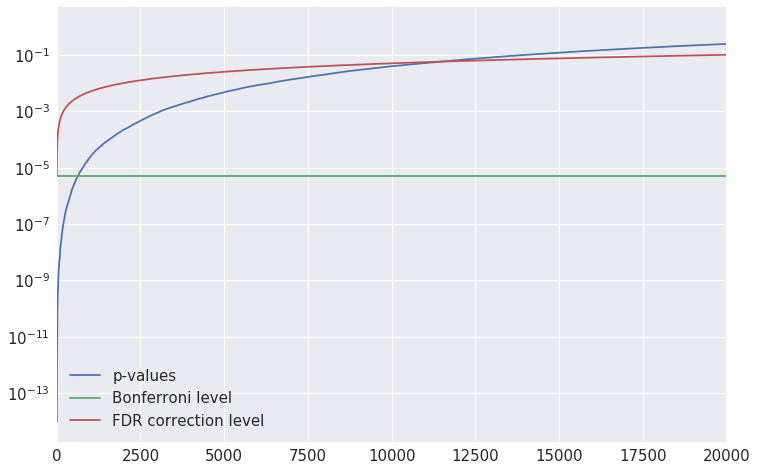

In [104]:
from sklearn.feature_selection import f_regression

_, pvals = f_regression(X=masked_timecourses, y=classification_target)
alpha = 0.2

plt.figure(figsize=(12, 8))

plt.plot(np.arange(len(pvals)), np.sort(pvals), label='p-values')
plt.plot(np.arange(len(pvals)), len(pvals) * [alpha / len(pvals)], label='Bonferroni level')
plt.plot(np.arange(len(pvals)), np.arange(1, len(pvals) + 1) * alpha / len(pvals), label='FDR correction level')
plt.legend()
plt.yscale('log')
plt.xlim(0, 20000)
plt.show()

In [105]:
class FTestCorrector:
    def __init__(self, alpha=0.1, method='bonferroni'):
        self.alpha = alpha
        self.mask = None
        self.method = method
        
    def fit(self, X, y):
        from sklearn.feature_selection import f_regression
        _, pvals = f_regression(X=X, y=y)
        if self.method == 'bonferroni':
            self.mask = pvals <= self.alpha / X.shape[1]
        elif self.method == 'fdr':
            self.mask, *_ = multitest.multipletests(pvals, alpha=self.alpha, method='fdr_bh')
        else:
            ValueError('No such method')
        return self
        
    def transform(self, X):
        return X[:, self.mask]

In [106]:
ftcorr = FTestCorrector(method='bonferroni', alpha=0.1)
pline = Pipeline([('ftest', ftcorr), ('lr', lr)])

In [107]:
cross_val_score(estimator=pline, X=masked_timecourses,
                y=classification_target, cv=StratifiedKFold(n_splits=5, shuffle=True), 
                groups=session_labels, scoring="roc_auc").mean()

0.9599767027442176

In [108]:
ftcorr = FTestCorrector(method='fdr', alpha=0.1)
pline = Pipeline([('ftest', ftcorr), ('lr', lr)])

In [109]:
cross_val_score(estimator=pline, X=masked_timecourses,
                y=classification_target, cv=StratifiedKFold(n_splits=5, shuffle=True), 
                groups=session_labels, scoring="roc_auc").mean()

0.9890196216006603

In [110]:
# Будем классифицировать по отдельным людям и по 12 сессиям отдельно.
cv = 5
alpha = 0.01
methods = ['bonferroni', 'fdr']


lr_scores = defaultdict(lambda: defaultdict(float))
for method in methods:
    for category in tqdm(categories):
        print("Processing %s, %s" % (method, category))
        ftcorr = FTestCorrector(method=method, alpha=alpha)
        pline = Pipeline([('ftest', ftcorr), ('lr', lr)])
        classification_target = (stimuli[task_mask] == category)
        lr_scores[method][category] = cross_val_score(estimator=pline, X=masked_timecourses,
                                                      y=classification_target, cv=StratifiedKFold(n_splits=cv, shuffle=True), 
                                                      groups=session_labels, scoring="roc_auc")

  0%|          | 0/8 [00:00<?, ?it/s]

Processing bonferroni, scissors


 12%|█▎        | 1/8 [00:01<00:09,  1.30s/it]

Processing bonferroni, face


 25%|██▌       | 2/8 [00:02<00:08,  1.41s/it]

Processing bonferroni, cat


 38%|███▊      | 3/8 [00:04<00:07,  1.41s/it]

Processing bonferroni, shoe


 50%|█████     | 4/8 [00:05<00:05,  1.37s/it]

Processing bonferroni, house


 62%|██████▎   | 5/8 [00:06<00:04,  1.37s/it]

Processing bonferroni, scrambledpix


 75%|███████▌  | 6/8 [00:08<00:02,  1.36s/it]

Processing bonferroni, bottle


 88%|████████▊ | 7/8 [00:09<00:01,  1.40s/it]

Processing bonferroni, chair


  0%|          | 0/8 [00:00<?, ?it/s]

Processing fdr, scissors


 12%|█▎        | 1/8 [00:02<00:14,  2.04s/it]

Processing fdr, face


 25%|██▌       | 2/8 [00:04<00:14,  2.41s/it]

Processing fdr, cat


 38%|███▊      | 3/8 [00:06<00:11,  2.26s/it]

Processing fdr, shoe


 50%|█████     | 4/8 [00:08<00:08,  2.14s/it]

Processing fdr, house


 62%|██████▎   | 5/8 [00:10<00:06,  2.18s/it]

Processing fdr, scrambledpix


 75%|███████▌  | 6/8 [00:12<00:04,  2.09s/it]

Processing fdr, bottle


 88%|████████▊ | 7/8 [00:21<00:03,  3.11s/it]

Processing fdr, chair


100%|██████████| 8/8 [00:25<00:00,  3.23s/it]


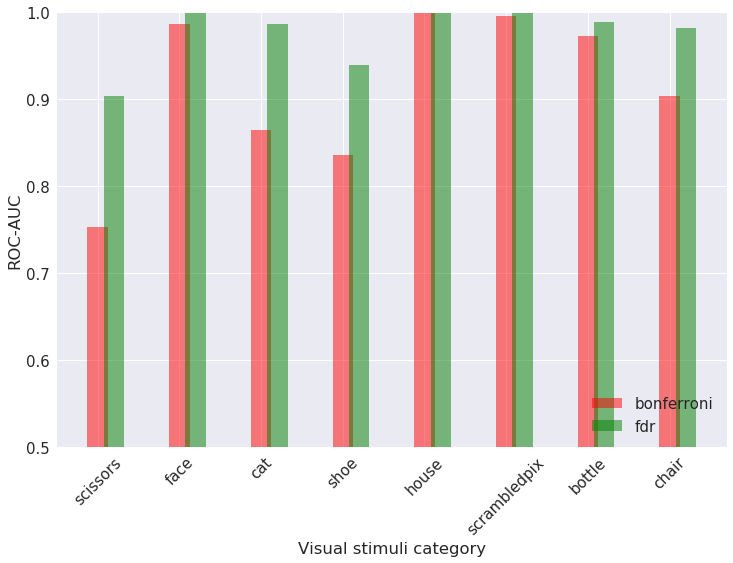

In [111]:
plt.figure(figsize=(12, 8))

tick_position = np.arange(len(categories))
plt.xticks(tick_position, categories, rotation=45)

for color, method in zip('rg', methods):
    score_means = [lr_scores[method][category].mean()
                   for category in categories]
    plt.bar(tick_position, score_means, label=method,
            width=.25, color=color, alpha=0.5)
    tick_position = tick_position + .2

plt.ylabel('ROC-AUC')
plt.xlabel('Visual stimuli category')
plt.ylim(0.5, 1.)
plt.legend(loc='lower right')
plt.show()

## Second-level fMRI model: a two-sample test

Пример чисто для красоты.

Взят из: https://nistats.github.io/auto_examples/03_second_level_models/plot_second_level_two_sample_test.html

In [112]:
from nilearn import datasets
n_samples = 20
localizer_dataset = datasets.fetch_localizer_calculation_task(n_subjects=n_samples)

/home/acapello/anaconda3/lib/python3.6/site-packages/numpy/lib/npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [113]:
cmap_filenames = localizer_dataset.cmaps

In [114]:
import pandas as pd
design_matrix = pd.DataFrame([1] * n_samples, columns=['intercept'])

In [115]:
from nistats.second_level_model import SecondLevelModel
second_level_model = SecondLevelModel().fit(cmap_filenames, design_matrix=design_matrix)

/home/acapello/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [116]:
z_map = second_level_model.compute_contrast(output_type='z_score')

In [117]:
from nistats.thresholding import map_threshold
thresholded_map1, threshold1 = map_threshold(z_map, level=.001, height_control='fpr', cluster_threshold=10)

In [118]:
thresholded_map2, threshold2 = map_threshold(z_map, level=.05, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)

The FDR=.05 threshold is 2.06


In [119]:
thresholded_map3, threshold3 = map_threshold(z_map, level=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)

The p<.05 Bonferroni-corrected threshold is 4.74


/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


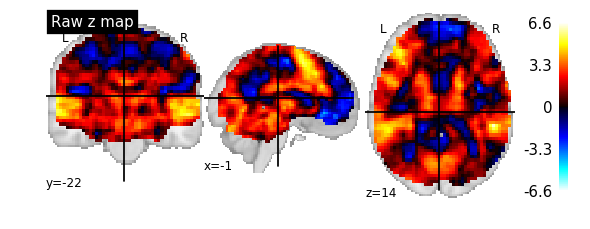

In [120]:
from nilearn import plotting
display = plotting.plot_stat_map(z_map, title='Raw z map')

/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


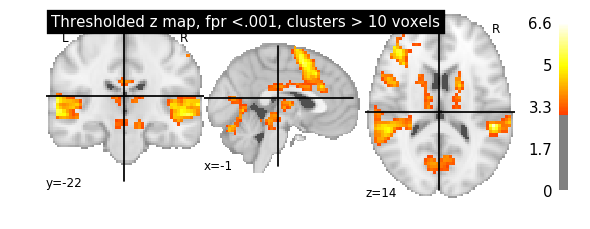

In [121]:
plotting.plot_stat_map(
    thresholded_map1, cut_coords=display.cut_coords, threshold=threshold1,
    title='Thresholded z map, fpr <.001, clusters > 10 voxels')

/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


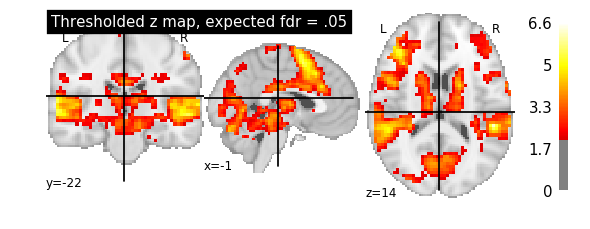

In [122]:
plotting.plot_stat_map(thresholded_map2, cut_coords=display.cut_coords,
                       title='Thresholded z map, expected fdr = .05',
                       threshold=threshold2)

/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


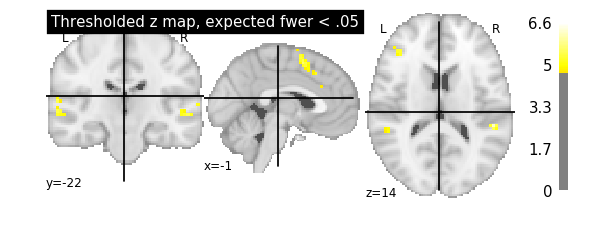

In [123]:
plotting.plot_stat_map(thresholded_map3, cut_coords=display.cut_coords,
                       title='Thresholded z map, expected fwer < .05',
                       threshold=threshold3)

# 5. Апостериорные тесты (Tukey, Holm-Sidak tests и другие)

![](cylinders.jpeg)

Здесь мы будем смотреть на MPG(=Miles Per Gallon) и сравнивать их средние значения для разных количеств цилиндров с помощью разных тестов на множественные сравнения.

In [124]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")

In [125]:
data = pd.read_csv('./auto_mpg.data',sep='\s+',names = ['MPG','Cylinders','Displacement','Horse power','Weight','Acceleration','Model Year','Origin','Car Name'])

In [126]:
cylinders = data.Cylinders.values
mpg = data.MPG.values

In [127]:
cylinders_unique = np.unique(cylinders)

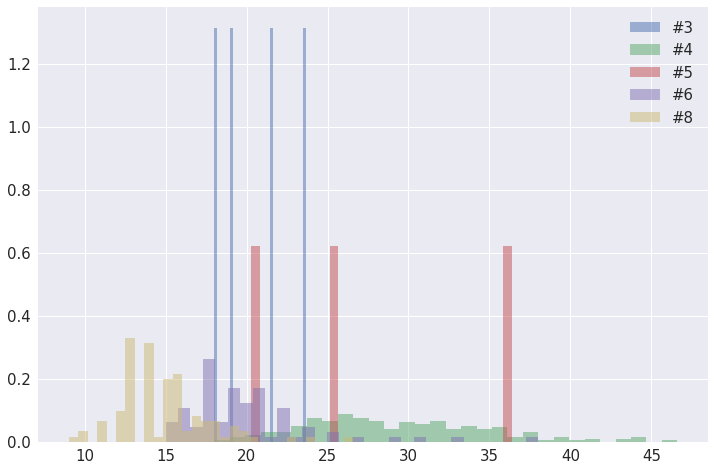

In [128]:
plt.figure(figsize=(12, 8))
for cylinder in cylinders_unique:
    plt.hist(mpg[cylinders==cylinder], bins=30, alpha=0.5, label='#{}'.format(cylinder), density=True)
plt.legend()
plt.show()

In [129]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [130]:
from statsmodels.stats.multitest import multipletests

In [131]:
multicomp = MultiComparison(mpg, cylinders)

## Пакет `statsmodels`

Пакет `statsmodels` содержит прекрасные функции `MultiComparison` и `multipletests` в которых реализованы практически все возможные тесты.

![](types_corrections.png)

In [132]:
['bonferroni', 'sidak', 'holm-sidak', 'holm', 
 'simes-hochberg', 'hommel', 'fdr_bh', 'fdr_by', 
 'fdr_tsbh', 'fdr_tsbky']

['bonferroni',
 'sidak',
 'holm-sidak',
 'holm',
 'simes-hochberg',
 'hommel',
 'fdr_bh',
 'fdr_by',
 'fdr_tsbh',
 'fdr_tsbky']

Всё что нужно, это указать какой именно тест для множественных сравнений вы используете и функцию, которая генерирует p-values для пар групп.

К примеру, мы можем посмотреть на то как работает t-тест и критерий Манна-Уитни с Benjamini/Hochberg коррекцией для нашей задачи.

In [133]:
from scipy.stats import ttest_ind, mannwhitneyu

### Критерий Манна-Уитни c Bonferroni и Benjamini/Hochberg коррекцией

In [134]:
sumtab, *_ = multicomp.allpairtest(testfunc=mannwhitneyu, alpha=0.01, 
                                   method='bonferroni')

In [135]:
sumtab

group1,group2,stat,pval,pval_corr,reject
3,4,45.5,0.0012,0.0119,True
3,5,2.0,0.108,1.0,False
3,6,132.0,0.2378,1.0,False
3,8,27.0,0.0016,0.0158,True
4,5,246.0,0.2816,1.0,False
4,6,1206.5,0.0,0.0,True
4,8,165.0,0.0,0.0,True
5,6,36.5,0.019,0.1897,False
5,8,4.0,0.002,0.02,True
6,8,895.5,0.0,0.0,True


In [136]:
sumtab, *_ = multicomp.allpairtest(testfunc=mannwhitneyu, alpha=0.01, 
                                   method='fdr_bh')

In [137]:
sumtab

group1,group2,stat,pval,pval_corr,reject
3,4,45.5,0.0012,0.003,True
3,5,2.0,0.108,0.135,False
3,6,132.0,0.2378,0.2643,False
3,8,27.0,0.0016,0.0032,True
4,5,246.0,0.2816,0.2816,False
4,6,1206.5,0.0,0.0,True
4,8,165.0,0.0,0.0,True
5,6,36.5,0.019,0.0271,True
5,8,4.0,0.002,0.0033,True
6,8,895.5,0.0,0.0,True


### t-тест c Benjamini/Hochberg коррекцией

In [138]:
sumtab, *_ = multicomp.allpairtest(testfunc=ttest_ind, alpha=0.01, 
                                   method='fdr_bh')

In [139]:
sumtab

group1,group2,stat,pval,pval_corr,reject
3,4,-3.0483,0.0026,0.0037,True
3,5,-1.6023,0.17,0.2125,False
3,6,0.2924,0.7707,0.7707,False
3,8,3.8754,0.0002,0.0004,True
4,5,0.5752,0.5658,0.6287,False
4,6,13.7186,0.0,0.0,True
4,8,23.9936,0.0,0.0,True
5,6,3.1655,0.0021,0.0036,True
5,8,6.9851,0.0,0.0,True
6,8,10.3295,0.0,0.0,True


### Критерий Манна-Уитни c Holm-Sidak коррекцией


Очень похож на Бонферрони, но граничные $\alpha$ для $m$ гипотез считаются следующим образом:

$$ \alpha_{(1)} = 1 - (1 - \alpha)^{1/m},  \alpha_{(2)} = 1 - (1 - \alpha)^{1/(m-1)}, \dots, \alpha_{(m)} = 1 - (1 - \alpha)^{1}$$

Этот тест более мощный чем Бонферонни.

In [140]:
sumtab, *_ = multicomp.allpairtest(testfunc=ttest_ind, alpha=0.01, 
                                   method='holm-sidak')

In [141]:
sumtab

group1,group2,stat,pval,pval_corr,reject
3,4,-3.0483,0.0026,0.0107,True
3,5,-1.6023,0.17,0.4282,False
3,6,0.2924,0.7707,0.8115,False
3,8,3.8754,0.0002,0.0011,True
4,5,0.5752,0.5658,0.8115,False
4,6,13.7186,0.0,0.0,True
4,8,23.9936,0.0,0.0,True
5,6,3.1655,0.0021,0.0107,True
5,8,6.9851,0.0,0.0,True
6,8,10.3295,0.0,0.0,True


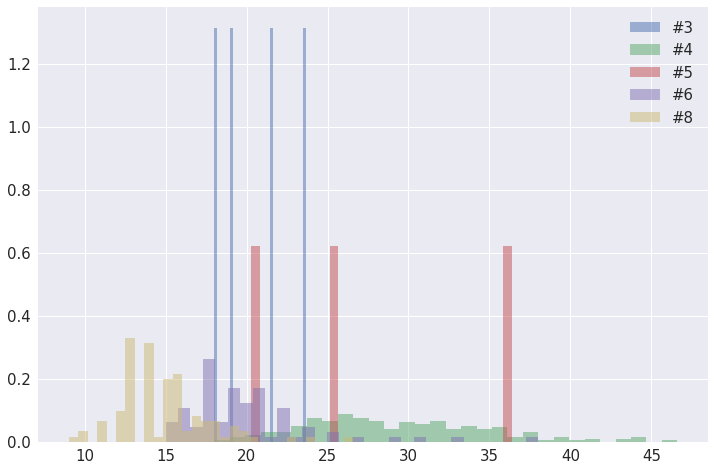

In [142]:
plt.figure(figsize=(12, 8))
for cylinder in cylinders_unique:
    plt.hist(mpg[cylinders==cylinder], bins=30, alpha=0.5, label='#{}'.format(cylinder), density=True)
plt.legend()
plt.show()

# TBA
## Under construction

### Tukey test



In [143]:
tk = multicomp.tukeyhsd(0.05)

group1,group2,meandiff,lower,upper,reject
3,4,8.7368,2.1903,15.2833,True
3,5,6.8167,-3.0867,16.72,False
3,6,-0.5643,-7.2001,6.0715,False
3,8,-5.5869,-12.1948,1.021,False
4,5,-1.9201,-9.4612,5.621,False
4,6,-9.3011,-10.982,-7.6201,True
4,8,-14.3237,-15.891,-12.7563,True
5,6,-7.381,-14.9997,0.2378,False
5,8,-12.4036,-19.998,-4.8091,True
6,8,-5.0226,-6.9289,-3.1163,True


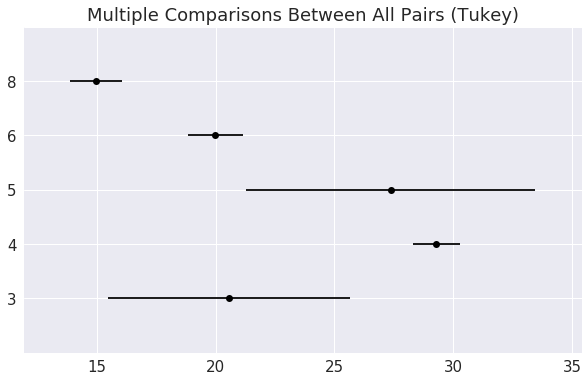

In [144]:
tk.plot_simultaneous()
tk.summary()

### Newman-Keuls Test

Последовательный тест, который очень сильно связан с ANOVA, поэтому он будет рассказан на следующем занятии :)

In [145]:
from statsmodels.sandbox.stats.multicomp import homogeneous_subsets

In [146]:
homogeneous_subsets?

In [147]:
stds_ab = np.zeros((len(cylinders_unique), len(cylinders_unique)))
means = []

In [148]:
for i, cylinder_i in enumerate(cylinders_unique):
    means.append(np.mean(mpg[cylinder_i==cylinders]))
    for cylinder_j in enumerate(cylinders_unique):
        pass
        # stds_ab[i][j] = np.NAN